# BT4012 Project: Data Preprocessing & Feature Engineering
### Completed by: Group 8

# Import Packages

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load Datasets & Basic EDA

#### Train set

In [395]:
train_df = pd.read_csv('../data/preliminary/train.csv')
train_df.head()

Unnamed: 0 trans_date_trans_time               cc_num  \
0     1072349   2020-03-21 19:05:27     2242542703101233   
1     1123019   2020-04-12 21:34:21  4469777115158234880   
2     1287799   2020-06-17 16:24:29  4312133045694601139   
3      640815   2019-09-29 19:34:07       30029052116970   
4      668880   2019-10-12 14:38:12     3500969075198072   

                              merchant        category     amt    first  \
0                fraud_Bahringer Group  health_fitness    1.40   Samuel   
1  fraud_Douglas, Schneider and Turner    shopping_pos    9.73  Gregory   
2               fraud_Fritsch and Sons  health_fitness   21.84   Julian   
3                       fraud_Wiza LLC        misc_pos    8.16   Curtis   
4                   fraud_Predovic Inc    shopping_net  184.55  Kenneth   

      last gender                         street        city state    zip  \
0  Jenkins      M  43235 Mckenzie Views Apt. 837    Westport    KY  40077   
1   Graham      M                4005 Dana Glens     Methuen    MA   1844   
2    Price      M                086 Pierce Cove  Pikesville    MD  21208   
3    Young      M   4319 Watson Shoals Suite 658    Falconer    NY  14733   
4  Sanchez      M             0110 Ashley Forest       Tekoa    WA  99033   

       lat      long  city_pop                            job         dob  \
0  38.4921  -85.4524       564            Pensions consultant  1996-04-10   
1  42.7280  -71.1810     47249              Market researcher  1980-11-22   
2  39.3764  -76.7290     33917              Company secretary  1977-06-12   
3  42.1239  -79.1895      3833                   Metallurgist  1970-10-09   
4  47.2271 -117.0819       895  Clothing/textile technologist  1999-05-31   

                          trans_num   unix_time  merch_lat  merch_long  \
0  5a4c5bc47fd9ca60a9cdbe38423654b4  1363892727  37.965322  -85.661501   
1  af686a90fb3eff86e0a961d852550619  1365802461  43.044230  -71.136907   
2  f70fea505c5a765825aafb72d18c1aa5  1371486269  39.365746  -77.165503   
3  61d6b585be9cad4fd36409019b693aaa  1348947247  42.692928  -78.435859   
4  e7fc0dc8be81974dacd6fc4c7e3c5362  1350052692  47.861069 -116.983182   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [396]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             240000 non-null  int64  
 1   trans_date_trans_time  240000 non-null  object 
 2   cc_num                 240000 non-null  int64  
 3   merchant               240000 non-null  object 
 4   category               240000 non-null  object 
 5   amt                    240000 non-null  float64
 6   first                  240000 non-null  object 
 7   last                   240000 non-null  object 
 8   gender                 240000 non-null  object 
 9   street                 240000 non-null  object 
 10  city                   240000 non-null  object 
 11  state                  240000 non-null  object 
 12  zip                    240000 non-null  int64  
 13  lat                    240000 non-null  float64
 14  long                   240000 non-nu

In [397]:
train_df.describe()

Unnamed: 0        cc_num            amt            zip  \
count  2.400000e+05  2.400000e+05  240000.000000  240000.000000   
mean   6.461744e+05  4.209063e+17      82.137978   48760.114425   
std    3.751697e+05  1.314206e+18     182.731529   26920.620431   
min    1.000000e+00  6.041621e+10       1.000000    1257.000000   
25%    3.207442e+05  1.800429e+14       9.840000   26237.000000   
50%    6.455065e+05  3.521417e+15      48.580000   48174.000000   
75%    9.708892e+05  4.651007e+15      86.140000   72011.000000   
max    1.296673e+06  4.992346e+18   15047.030000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  240000.000000  240000.000000  2.400000e+05  2.400000e+05   
mean       38.545540     -90.204605  8.918851e+04  1.349169e+09   
std         5.069207      13.757986  3.032851e+05  1.287179e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.798000  7.430000e+02  1.338673e+09   
50%        39.371600     -87.461600  2.456000e+03  1.349109e+09   
75%        41.940400     -80.138100  2.032800e+04  1.359301e+09   
max        66.693300     -67.950300  2.906700e+06  1.371817e+09   

           merch_lat     merch_long       is_fraud  
count  240000.000000  240000.000000  240000.000000  
mean       38.544598     -90.204016       0.030550  
std         5.104405      13.770584       0.172095  
min        19.031242    -166.664828       0.000000  
25%        34.754159     -96.888902       0.000000  
50%        39.375016     -87.430950       0.000000  
75%        41.953029     -80.212441       0.000000  
max        67.510267     -66.959178       1.000000

#### Validation set

In [398]:
validation_df = pd.read_csv('../data/preliminary/validation.csv')
validation_df.head()

Unnamed: 0 trans_date_trans_time               cc_num  \
0     1032241   2020-03-03 14:32:35  4906628655840914250   
1      921195   2019-12-30 21:32:22         571365235126   
2      869168   2019-12-19 23:13:48        4755696071492   
3      956492   2020-01-19 14:48:11      370612217861404   
4      263801   2019-05-11 13:45:14     4378993458389626   

                                 merchant        category     amt    first  \
0                        fraud_Feil-Morar  health_fitness  283.13  Charles   
1                  fraud_Jakubowski Group     food_dining    6.57  Barbara   
2                      fraud_Erdman-Ebert   personal_care   12.23   Robert   
3  fraud_Greenholt, O'Hara and Balistreri    shopping_net    6.35   Amanda   
4     fraud_Schneider, Hayes and Nikolaus     food_dining    2.93   Travis   

         last gender                         street      city state    zip  \
0      Moreno      M  838 Franklin Prairie Apt. 902  Key West    FL  33040   
1      Taylor      F     0069 Robin Brooks Apt. 695   Elberta    MI  49628   
2       Evans      M  01892 Patricia Vista Apt. 828    Sachse    TX  75048   
3  Fitzgerald      F               298 Kayla Lights   Bristol    PA  19007   
4       Hayes      M               1561 Chase Grove    Conway    NH   3818   

       lat     long  city_pop  \
0  24.6557 -81.3824     32891   
1  44.5995 -86.2141       372   
2  32.9643 -96.6012     20328   
3  40.1159 -74.8536     21125   
4  43.9742 -71.1503      3807   

                                                job         dob  \
0                                      Town planner  1987-02-13   
1               Exhibitions officer, museum/gallery  1995-07-12   
2                                     Site engineer  1985-06-20   
3  Administrator, charities/voluntary organisations  1985-05-25   
4                                           Surgeon  1999-10-25   

                          trans_num   unix_time  merch_lat  merch_long  \
0  cad774f9be5e482b8a7eb4bb10c3893d  1362321155  25.512218  -82.292661   
1  e1cf7e14ffbb8ac4888982f79147694a  1356903142  44.034668  -85.607445   
2  2729c48fe5eb11ab671aa3341236cebc  1355958828  32.598802  -96.689835   
3  36d2a37aab561bb9335e82f1df4f96c7  1358606891  39.889060  -75.542567   
4  32a8bdeca822ad81674e544dbddc3ef3  1336743914  43.643013  -70.210856   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [399]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   trans_date_trans_time  30000 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   merchant               30000 non-null  object 
 4   category               30000 non-null  object 
 5   amt                    30000 non-null  float64
 6   first                  30000 non-null  object 
 7   last                   30000 non-null  object 
 8   gender                 30000 non-null  object 
 9   street                 30000 non-null  object 
 10  city                   30000 non-null  object 
 11  state                  30000 non-null  object 
 12  zip                    30000 non-null  int64  
 13  lat                    30000 non-null  float64
 14  long                   30000 non-null  float64
 15  ci

In [400]:
validation_df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  3.000000e+04  3.000000e+04  30000.000000  30000.000000  30000.000000   
mean   6.493316e+05  4.190471e+17     69.693680  48922.285433     38.577930   
std    3.720990e+05  1.310421e+18    148.140514  26928.110504      5.058415   
min    2.300000e+01  6.041621e+10      1.000000   1257.000000     20.027100   
25%    3.315445e+05  1.800429e+14      9.590000  26237.000000     34.668900   
50%    6.481560e+05  3.518759e+15     47.125000  48202.000000     39.401500   
75%    9.726132e+05  4.642255e+15     82.682500  72042.000000     42.014400   
max    1.296579e+06  4.992346e+18   9999.390000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  30000.000000  3.000000e+04  3.000000e+04  30000.000000  30000.000000   
mean     -90.303841  8.799095e+04  1.349286e+09     38.579220    -90.303098   
std       13.797428  2.977069e+05  1.276236e+07      5.090231     13.813347   
min     -165.672300  2.300000e+01  1.325377e+09     19.041880   -166.656560   
25%      -96.917700  7.440000e+02  1.339036e+09     34.768844    -96.976487   
50%      -87.591700  2.457000e+03  1.349240e+09     39.414335    -87.496679   
75%      -80.158000  2.032800e+04  1.359392e+09     41.984748    -80.251130   
max      -67.950300  2.906700e+06  1.371814e+09     66.554249    -66.962913   

           is_fraud  
count  30000.000000  
mean       0.005800  
std        0.075938  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

#### Test set

In [401]:
test_df = pd.read_csv('../data/preliminary/test.csv')
test_df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0      315706   2020-10-19 12:30:31  3566094707272327   
1      151754   2020-08-13 05:57:47  2610529083834453   
2      189099   2020-08-26 05:06:42  4873783502705038   
3      249823   2020-09-20 18:44:30  5540636818935089   
4      487280   2020-12-16 13:22:16   213163860545705   

                          merchant        category     amt      first  \
0     fraud_Hintz, Bauch and Smith  health_fitness   38.09   Kristina   
1          fraud_Hackett-Lueilwitz     grocery_pos  206.44      Tanya   
2           fraud_Bahringer-Larson     grocery_net   51.76  Elizabeth   
3           fraud_Jakubowski Group     food_dining   89.38    Kenneth   
4  fraud_Lowe, Dietrich and Erdman       kids_pets   41.72       Mark   

        last gender                          street         city state    zip  \
0    Stewart      F     47029 Jimmy Tunnel Apt. 106      Newhall    CA  91321   
1  Dickerson      F        053 Kim Valley Suite 928  Old Hickory    TN  37138   
2    Maxwell      F       194 Goodman Fall Apt. 569   Burlington    WA  98233   
3     Foster      M           329 Michael Extension     Lawrence    MA   1843   
4      Tyler      M  82201 Bradley Radial Suite 703        Avera    GA  30803   

       lat      long  city_pop                        job         dob  \
0  34.3795 -118.5230     34882           Health physicist  1971-04-25   
1  36.2416  -86.6117     22191             Prison officer  1994-07-27   
2  48.4786 -122.3345     14871       Public house manager  1974-03-10   
3  42.6911  -71.1605     76383               Geoscientist  1985-04-04   
4  33.1410  -82.5150       741  Claims inspector/assessor  1986-04-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  bc12159fcac8af1773fef1d8a1302731  1382185831  34.809923 -118.111582   
1  3b1d9ac4a26f3c56b0cf4cc407250f8d  1376373467  36.644354  -87.480427   
2  6975ab8f7f26df75cc6046b07f7ceeb5  1377493602  48.784813 -123.198143   
3  ee19c9619769485a654364e035b4c01f  1379702670  42.893355  -70.856259   
4  dac5f5438277e192aabd02e93ee6e1a1  1387200136  33.597864  -83.314567   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [402]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   trans_date_trans_time  30000 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   merchant               30000 non-null  object 
 4   category               30000 non-null  object 
 5   amt                    30000 non-null  float64
 6   first                  30000 non-null  object 
 7   last                   30000 non-null  object 
 8   gender                 30000 non-null  object 
 9   street                 30000 non-null  object 
 10  city                   30000 non-null  object 
 11  state                  30000 non-null  object 
 12  zip                    30000 non-null  int64  
 13  lat                    30000 non-null  float64
 14  long                   30000 non-null  float64
 15  ci

In [403]:
test_df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count   30000.00000  3.000000e+04  30000.000000  30000.000000  30000.000000   
mean   277464.05040  4.207335e+17     68.397767  48772.515967     38.525190   
std    160266.89681  1.314877e+18    133.799863  26860.632527      5.036476   
min         2.00000  6.041621e+10      1.000000   1257.000000     20.027100   
25%    139562.50000  1.800365e+14      9.570000  26237.000000     34.668900   
50%    275507.00000  3.519607e+15     47.600000  48174.000000     39.371600   
75%    416561.50000  4.642255e+15     83.152500  72011.000000     41.846700   
max    555710.00000  4.992346e+18   8517.380000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  30000.000000  3.000000e+04  3.000000e+04  30000.000000  30000.000000   
mean     -90.191732  8.723634e+04  1.380664e+09     38.528262    -90.188371   
std       13.633923  2.932312e+05  5.197068e+06      5.072750     13.647435   
min     -165.672300  2.300000e+01  1.371817e+09     19.027422   -166.669812   
25%      -96.787900  7.430000e+02  1.376049e+09     34.764436    -96.890949   
50%      -87.461600  2.456000e+03  1.380655e+09     39.395308    -87.423744   
75%      -80.175200  2.036550e+04  1.385863e+09     41.950251    -80.217881   
max      -67.950300  2.906700e+06  1.388534e+09     66.671540    -66.985234   

           is_fraud  
count  30000.000000  
mean       0.003867  
std        0.062063  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Data Preprocessing

### Steps
- Missing values (train, validation, test)
- Duplicate values (train, validation, test)
- Outliers (train, validation, test)
- Breaking down datetime columns (train, validation, test)
- Removing unnecessary features (train, validation, test)
- Resampling: oversampling fraud/undersampling non-fraud (train)
- Scaling: Standardisation/Normalisation (train, validation, test)
- Encoding (train: fit & transform, validation: transform, test: transform)

### Features
- Unnamed: 0
- trans_date_trans_time: Transaction DateTime
- cc_num: Credit Card Number of Customer
- merchant: Merchant Name
- category: Category of Merchant
- amt: Amount of Transaction
- first: First Name of Credit Card Holder
- last: Last Name of Credit Card Holder
- gender: Gender of Credit Card Holder
- street: Street Address of Credit Card Holder
- city: City of Credit Card Holder
- state: State of Credit Card Holder
- zip: Zip of Credit Card Holder
- lat: Latitude Location of Credit Card Holder
- long: Longitude Location of Credit Card Holder
- city_pop: Credit Card Holder's City Population
- job: Job of Credit Card Holder
- dob: Date of Birth of Credit Card Holder
- trans_num: Transaction Number
- unix_time: UNIX Time of transaction
- merch_lat: Latitude Location of Merchant
- merch_long: Longitude Location of Merchant
- is_fraud: Fraud Flag --> Target Class

Variables to scale: amt, unix_time, city_pop

Variables to encode: merchant, category, gender, city, state

Variables to remove: 'Unnamed: 0', street, zip, trans_num, first, last --> these variables either overlap with other features or are not meaningful features and can lead to model overfitting

Variables to feature engineer rather than preprocess: trans_date_trans_time, dob, lat, long, merch_lat, merch_long, cc_num, job

## Handling Missing Values
In this section, we will look for any missing values in the train, validation, and test sets. If there are missing values, we will handle them by imputation.

#### Train set

In [404]:
# check for null values
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [405]:
# check for na values
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Validation set

In [406]:
# check for null values
validation_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [407]:
# check for na values
validation_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Test set

In [408]:
# check for null values
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [409]:
# check for na values
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

As seen from above, there are no missing values in the train, validation, and test sets.

## Handling Duplicates
In this section, we will look for any duplicate rows in the train, validation, and test sets. If there are duplicate rows, we will remove them.

#### Train set

In [410]:
train_df[train_df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

#### Validation set

In [411]:
validation_df[validation_df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

#### Test set

In [412]:
test_df[test_df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

As seen from above, there are no duplicate rows in the train, validation, and test sets.

## Handling Outliers
In this section, we will look for outliers in the train, validation, and test sets. If there are outliers, we will handle them by imputation, removing, etc.

The following are feature checks that we will do to analyse for outliers:
- check that trans_date_trans_time matches with unix_time
- check that dob makes sense: day is 1-31, month is 1-12, and year is not overly old or recent (can use histograms)
- barplot for category, gender
- boxplot for amt, city_pop
- check that lat, merch_lat are between -90 and 90 inclusive
- check that long, merch_long are between -180 and 180 inclusive

#### Train set

In [413]:
import datetime
import time

# check that trans_date_trans_time matches with unix_time
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['unix_derived'] = train_df['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_train = train_df[train_df['unix_time'] != train_df['unix_derived']]
train_df = train_df.drop(columns=['unix_derived'])
mismatch_train

Unnamed: 0 trans_date_trans_time               cc_num  \
0          1072349   2020-03-21 19:05:27     2242542703101233   
1          1123019   2020-04-12 21:34:21  4469777115158234880   
2          1287799   2020-06-17 16:24:29  4312133045694601139   
3           640815   2019-09-29 19:34:07       30029052116970   
4           668880   2019-10-12 14:38:12     3500969075198072   
...            ...                   ...                  ...   
239995      589692   2019-09-07 16:09:20        4079773899158   
239996      314690   2019-06-01 06:52:28      180064817343047   
239997     1194213   2020-05-13 20:14:00       30408301059761   
239998     1073052   2020-03-22 02:48:25       38057513087029   
239999      618006   2019-09-20 01:57:46       30238755902988   

                                   merchant        category     amt     first  \
0                     fraud_Bahringer Group  health_fitness    1.40    Samuel   
1       fraud_Douglas, Schneider and Turner    shopping_pos    9.73   Gregory   
2                    fraud_Fritsch and Sons  health_fitness   21.84    Julian   
3                            fraud_Wiza LLC        misc_pos    8.16    Curtis   
4                        fraud_Predovic Inc    shopping_net  184.55   Kenneth   
...                                     ...             ...     ...       ...   
239995                    fraud_Waelchi Inc       kids_pets   12.88      Eric   
239996      fraud_Schuppe, Nolan and Hoeger    shopping_pos    1.63  Patricia   
239997                 fraud_Hilpert-Conroy       kids_pets   40.69   Brandon   
239998                   fraud_Luettgen PLC   gas_transport   47.25   Marissa   
239999                     fraud_Sporer Inc   gas_transport   44.38  Danielle   

            last gender                         street          city state  \
0        Jenkins      M  43235 Mckenzie Views Apt. 837      Westport    KY   
1         Graham      M                4005 Dana Glens       Methuen    MA   
2          Price      M                086 Pierce Cove    Pikesville    MD   
3          Young      M   4319 Watson Shoals Suite 658      Falconer    NY   
4        Sanchez      M             0110 Ashley Forest         Tekoa    WA   
...          ...    ...                            ...           ...   ...   
239995   Preston      M     7020 Doyle Stream Apt. 951          Mesa    ID   
239996  Gonzalez      F                8973 Mark Drive  Stephensport    KY   
239997   Pittman      M              2881 Frey Village         Cross    SC   
239998     Clark      F    2677 Byrd Village Suite 035      San Jose    CA   
239999        Yu      F     5395 Colon Burgs Suite 037        Thrall    TX   

          zip      lat      long  city_pop  \
0       40077  38.4921  -85.4524       564   
1        1844  42.7280  -71.1810     47249   
2       21208  39.3764  -76.7290     33917   
3       14733  42.1239  -79.1895      3833   
4       99033  47.2271 -117.0819       895   
...       ...      ...       ...       ...   
239995  83643  44.6255 -116.4493       129   
239996  40170  37.9048  -86.5240       344   
239997  29436  33.3364  -80.1859      4471   
239998  95148  37.3304 -121.7913    973849   
239999  76578  30.5920  -97.2893      1766   

                                        job         dob  \
0                       Pensions consultant  1996-04-10   
1                         Market researcher  1980-11-22   
2                         Company secretary  1977-06-12   
3                              Metallurgist  1970-10-09   
4             Clothing/textile technologist  1999-05-31   
...                                     ...         ...   
239995                         Cartographer  1965-12-15   
239996  Chartered public finance accountant  1967-03-30   
239997               Occupational hygienist  1973-10-09   
239998                         Geoscientist  1997-01-18   
239999                            Press sub  1976-01-02   

                               trans_num   unix_time  m

In [414]:
# check that dob makes sense: day is 1-31, month is 1-12
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['dob_year'] = train_df['dob'].dt.year
train_df['dob_month'] = train_df['dob'].dt.month
train_df['dob_day'] = train_df['dob'].dt.day

wrong_days_train = len(train_df[(train_df['dob_day'] < 1) | (train_df['dob_day'] > 31)])
wrong_months_train = len(train_df[(train_df['dob_month'] < 1) | (train_df['dob_month'] > 12)])
print('Number of incorrect days in train set:', wrong_days_train)
print('Number of incorrect months in train set:', wrong_months_train)

Number of incorrect days in train set: 0
Number of incorrect months in train set: 0


Oldest birth year in train set: 1924
Latest birth year in train set: 2005


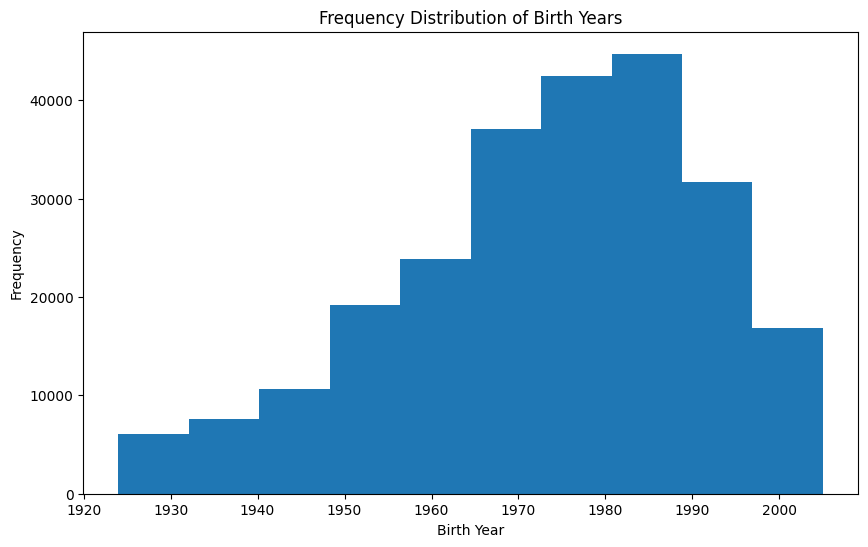

In [415]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_train = train_df['dob_year'].min()
max_dob_year_train = train_df['dob_year'].max()
print('Oldest birth year in train set:', min_dob_year_train)
print('Latest birth year in train set:', max_dob_year_train)

plt.figure(figsize=(10, 6))
plt.hist(train_df['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

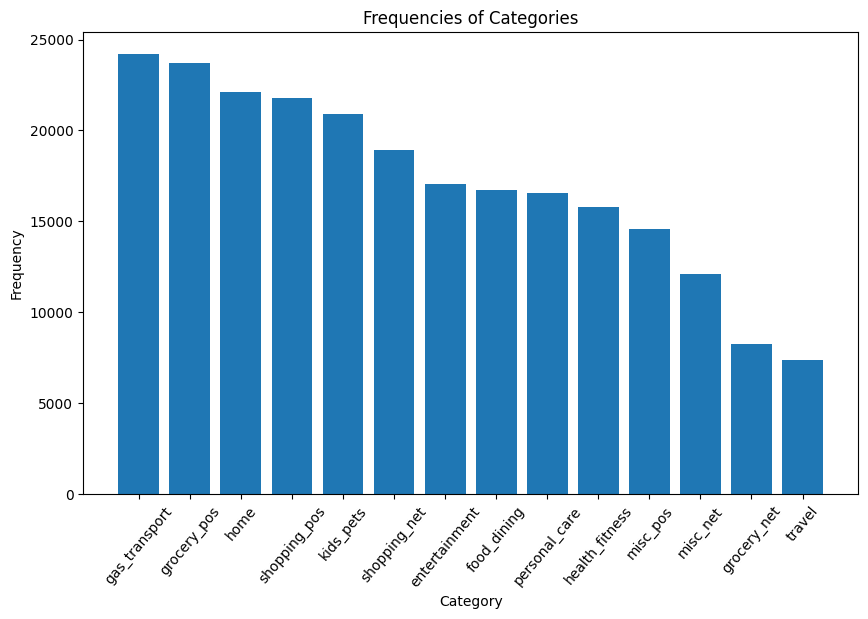

In [416]:
# barplot for category
cat_counts_train = train_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_train.index), cat_counts_train.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

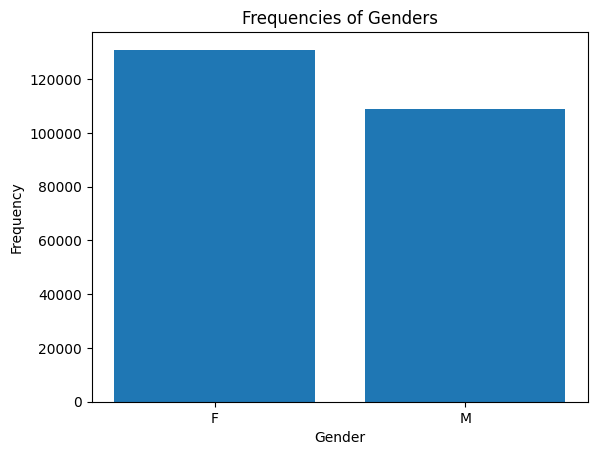

In [417]:
# barplot for gender
gender_counts_train = train_df['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_train.index), gender_counts_train.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

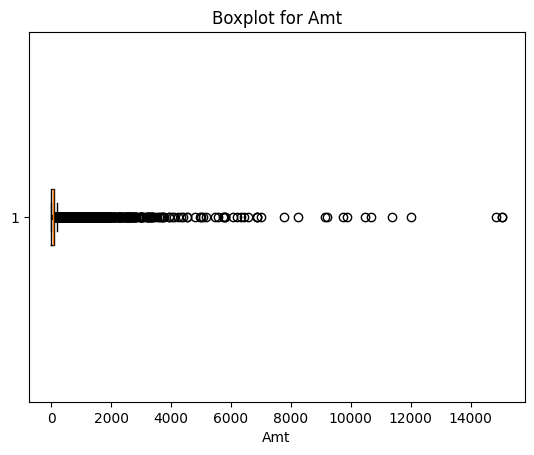

In [418]:
# boxplot for amt
plt.figure()
plt.boxplot(train_df['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

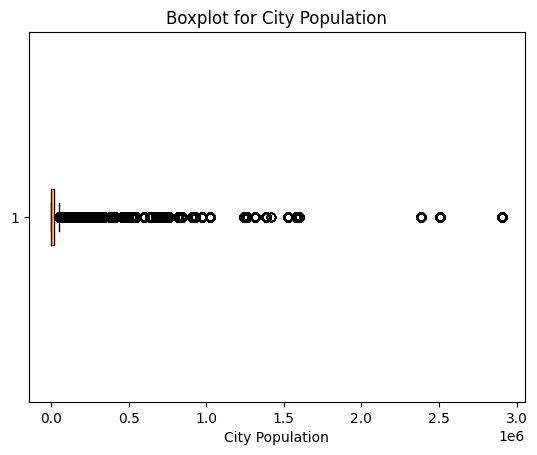

In [419]:
# boxplot for city_pop
plt.figure()
plt.boxplot(train_df['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [420]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in train set:', len(train_df[(train_df['lat'] < -90) | (train_df['lat'] > 90)]))
print('Number of incorrect long in train set:', len(train_df[(train_df['long'] < -180) | (train_df['long'] > 180)]))
print('Number of incorrect merch_lat in train set:', len(train_df[(train_df['merch_lat'] < -90) | (train_df['merch_lat'] > 90)]))
print('Number of incorrect merch_long in train set:', len(train_df[(train_df['merch_long'] < -180) | (train_df['merch_long'] > 180)]))

Number of incorrect lat in train set: 0
Number of incorrect long in train set: 0
Number of incorrect merch_lat in train set: 0
Number of incorrect merch_long in train set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the train set. However, when each value of trans_date_trans_time is converted to its unix timestamp, the derived unix timestamp does not match its corresponding unix_time. Hence, further investigation is needed and we may need to remove the unix_time feature. 

#### Validation set

In [421]:
# check that trans_date_trans_time matches with unix_time
validation_df['trans_date_trans_time'] = pd.to_datetime(validation_df['trans_date_trans_time'])
validation_df['unix_derived'] = validation_df['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_valid = validation_df[validation_df['unix_time'] != validation_df['unix_derived']]
validation_df = validation_df.drop(columns=['unix_derived'])
mismatch_valid

Unnamed: 0 trans_date_trans_time               cc_num  \
0         1032241   2020-03-03 14:32:35  4906628655840914250   
1          921195   2019-12-30 21:32:22         571365235126   
2          869168   2019-12-19 23:13:48        4755696071492   
3          956492   2020-01-19 14:48:11      370612217861404   
4          263801   2019-05-11 13:45:14     4378993458389626   
...           ...                   ...                  ...   
29995       44712   2019-01-27 16:48:53      377026671291680   
29996     1003095   2020-02-16 03:04:59     5501083170975659   
29997     1041188   2020-03-08 05:22:23      213148039875802   
29998      477760   2019-07-28 19:07:55     3535808924394848   
29999      375392   2019-06-22 17:21:39     4155021259183870   

                                     merchant        category     amt  \
0                            fraud_Feil-Morar  health_fitness  283.13   
1                      fraud_Jakubowski Group     food_dining    6.57   
2                          fraud_Erdman-Ebert   personal_care   12.23   
3      fraud_Greenholt, O'Hara and Balistreri    shopping_net    6.35   
4         fraud_Schneider, Hayes and Nikolaus     food_dining    2.93   
...                                       ...             ...     ...   
29995     fraud_Mosciski, Ziemann and Farrell    shopping_net    2.63   
29996   fraud_McCullough, Hudson and Schuster     food_dining   34.38   
29997                      fraud_Miller-Hauck     grocery_pos  180.93   
29998                     fraud_Rolfson-Kunde   personal_care   74.48   
29999    fraud_Streich, Rolfson and Wilderman       kids_pets  104.23   

         first        last gender                         street  \
0      Charles      Moreno      M  838 Franklin Prairie Apt. 902   
1      Barbara      Taylor      F     0069 Robin Brooks Apt. 695   
2       Robert       Evans      M  01892 Patricia Vista Apt. 828   
3       Amanda  Fitzgerald      F               298 Kayla Lights   
4       Travis       Hayes      M               1561 Chase Grove   
...        ...         ...    ...                            ...   
29995   Jackie       Davis      F      1898 Parker Fork Apt. 057   
29996    Wayne       Payne      M    587 Bradley Inlet Suite 281   
29997     Jill      Jacobs      F         034 Kimberly Mountains   
29998  Matthew       Myers      M           4936 Michelle Points   
29999    Renee     Parrish      F   174 Jennifer Meadow Apt. 467   

                 city state    zip      lat     long  city_pop  \
0            Key West    FL  33040  24.6557 -81.3824     32891   
1             Elberta    MI  49628  44.5995 -86.2141       372   
2              Sachse    TX  75048  32.9643 -96.6012     20328   
3             Bristol    PA  19007  40.1159 -74.8536     21125   
4              Conway    NH   3818  43.9742 -71.1503      3807   
...               ...   ...    ...      ...      ...       ...   
29995         Redford    MO  63665  37.3272 -91.0243       241   
29996  Cuyahoga Falls    OH  44223  41.1464 -81.5107     47772   
29997         Brandon    FL  33510  27.9551 -82.2966     79613   
29998      Tower Hill    IL  62571  39.3900 -88.9597      1532   
29999   Mountain Park    OK  73559  34.7032 -98.9591       540   

                                                    job         dob  \
0                                          Town planner  1987-02-13   
1                   Exhibitions officer, museum/gallery  1995-07-12   
2                                         Site engineer  1985-06-20   
3      Administrator, charities/voluntary organisations  1985-05-25   
4                                               Surgeon  1999-10-25   
...                                                 ...         ...   
29995                                Investment analyst  1974-10-27   
29996                                   Equities trader  1966-01-04   
29997                          Environmental consultant  1978-11-30   
29998                         Radio broad

In [422]:
# check that dob makes sense: day is 1-31, month is 1-12
validation_df['dob'] = pd.to_datetime(validation_df['dob'])
validation_df['dob_year'] = validation_df['dob'].dt.year
validation_df['dob_month'] = validation_df['dob'].dt.month
validation_df['dob_day'] = validation_df['dob'].dt.day

wrong_days_valid = len(validation_df[(validation_df['dob_day'] < 1) | (validation_df['dob_day'] > 31)])
wrong_months_valid = len(validation_df[(validation_df['dob_month'] < 1) | (validation_df['dob_month'] > 12)])
print('Number of incorrect days in validation set:', wrong_days_valid)
print('Number of incorrect months in validation set:', wrong_months_valid)

Number of incorrect days in validation set: 0
Number of incorrect months in validation set: 0


Oldest birth year in validation set: 1924
Latest birth year in validation set: 2005


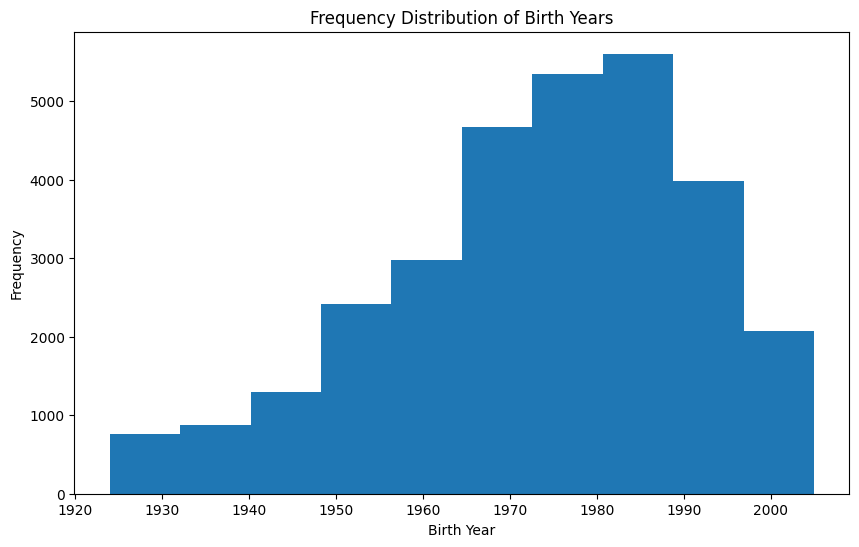

In [423]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_valid = validation_df['dob_year'].min()
max_dob_year_valid = validation_df['dob_year'].max()
print('Oldest birth year in validation set:', min_dob_year_valid)
print('Latest birth year in validation set:', max_dob_year_valid)

plt.figure(figsize=(10, 6))
plt.hist(validation_df['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

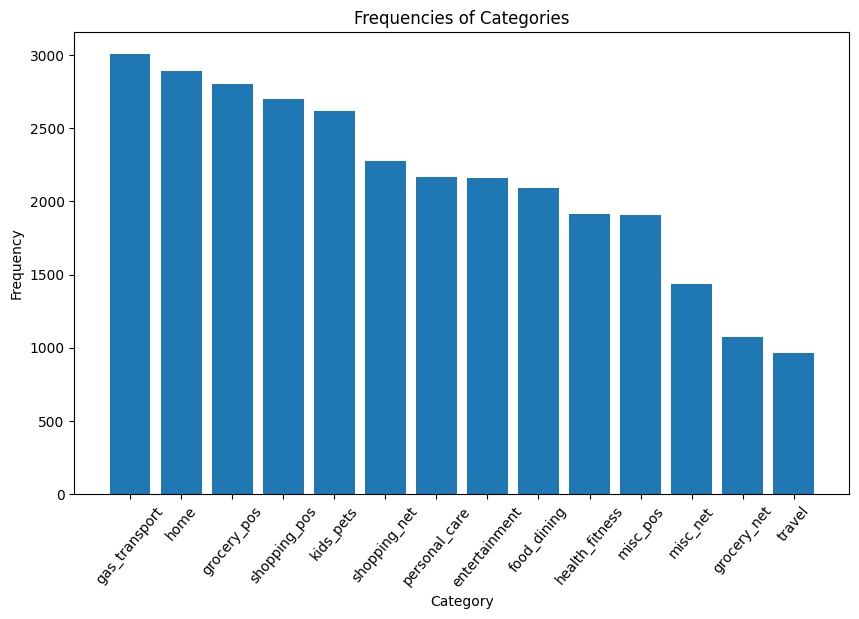

In [424]:
# barplot for category
cat_counts_valid = validation_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_valid.index), cat_counts_valid.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

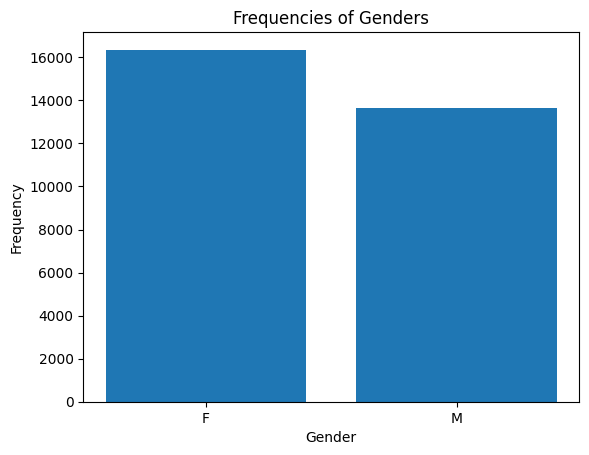

In [425]:
# barplot for gender
gender_counts_valid = validation_df['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_valid.index), gender_counts_valid.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

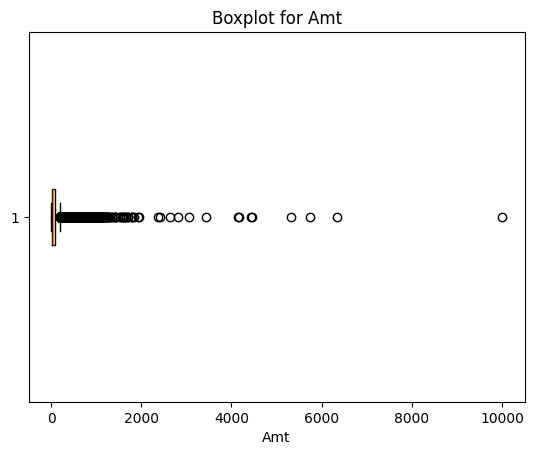

In [426]:
# boxplot for amt
plt.figure()
plt.boxplot(validation_df['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

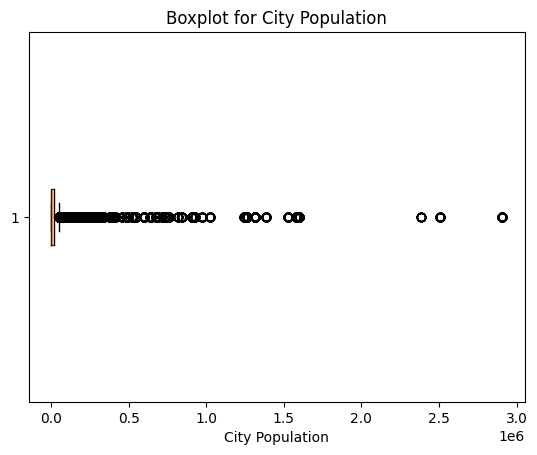

In [427]:
# boxplot for city_pop
plt.figure()
plt.boxplot(validation_df['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [428]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in validation set:', len(validation_df[(validation_df['lat'] < -90) | (validation_df['lat'] > 90)]))
print('Number of incorrect long in validation set:', len(validation_df[(validation_df['long'] < -180) | (validation_df['long'] > 180)]))
print('Number of incorrect merch_lat in validation set:', len(validation_df[(validation_df['merch_lat'] < -90) | (validation_df['merch_lat'] > 90)]))
print('Number of incorrect merch_long in validation set:', len(validation_df[(validation_df['merch_long'] < -180) | (validation_df['merch_long'] > 180)]))

Number of incorrect lat in validation set: 0
Number of incorrect long in validation set: 0
Number of incorrect merch_lat in validation set: 0
Number of incorrect merch_long in validation set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the validation set. However, when each value of trans_date_trans_time is converted to its unix timestamp, the derived unix timestamp does not match its corresponding unix_time. Hence, further investigation is needed and we may need to remove the unix_time feature. 

#### Test set

In [429]:
# check that trans_date_trans_time matches with unix_time
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['unix_derived'] = test_df['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_test = test_df[test_df['unix_time'] != test_df['unix_derived']]
test_df = test_df.drop(columns=['unix_derived'])
mismatch_test

Unnamed: 0 trans_date_trans_time            cc_num  \
0          315706   2020-10-19 12:30:31  3566094707272327   
1          151754   2020-08-13 05:57:47  2610529083834453   
2          189099   2020-08-26 05:06:42  4873783502705038   
3          249823   2020-09-20 18:44:30  5540636818935089   
4          487280   2020-12-16 13:22:16   213163860545705   
...           ...                   ...               ...   
29995      350245   2020-11-03 08:28:32      630441765090   
29996       98989   2020-07-26 04:21:58   377234009633447   
29997      453234   2020-12-08 21:06:20     4383521454815   
29998      388879   2020-11-20 17:14:58   180058696935600   
29999      158827   2020-08-16 08:26:27   377113842678100   

                                          merchant        category     amt  \
0                     fraud_Hintz, Bauch and Smith  health_fitness   38.09   
1                          fraud_Hackett-Lueilwitz     grocery_pos  206.44   
2                           fraud_Bahringer-Larson     grocery_net   51.76   
3                           fraud_Jakubowski Group     food_dining   89.38   
4                  fraud_Lowe, Dietrich and Erdman       kids_pets   41.72   
...                                            ...             ...     ...   
29995                               fraud_Wolf Inc     grocery_pos  130.74   
29996                            fraud_Kerluke Inc        misc_net  271.20   
29997                       fraud_Little-Gleichner          travel    7.79   
29998  fraud_Klocko, Runolfsdottir and Breitenberg  health_fitness    2.96   
29999                       fraud_Denesik and Sons    shopping_pos    1.98   

           first        last gender                          street  \
0       Kristina     Stewart      F     47029 Jimmy Tunnel Apt. 106   
1          Tanya   Dickerson      F        053 Kim Valley Suite 928   
2      Elizabeth     Maxwell      F       194 Goodman Fall Apt. 569   
3        Kenneth      Foster      M           329 Michael Extension   
4           Mark       Tyler      M  82201 Bradley Radial Suite 703   
...          ...         ...    ...                             ...   
29995      Susan  Washington      F        759 Erin Mount Suite 956   
29996    Theresa   Blackwell      F          43576 Kristina Islands   
29997       John   Robertson      M      209 Austin Stream Apt. 231   
29998    Richard      Barnes      M  1339 Johnson Landing Suite 007   
29999      Billy   Gallagher      M                673 Delgado Burg   

                      city state    zip      lat      long  city_pop  \
0                  Newhall    CA  91321  34.3795 -118.5230     34882   
1              Old Hickory    TN  37138  36.2416  -86.6117     22191   
2               Burlington    WA  98233  48.4786 -122.3345     14871   
3                 Lawrence    MA   1843  42.6911  -71.1605     76383   
4                    Avera    GA  30803  33.1410  -82.5150       741   
...                    ...   ...    ...      ...       ...       ...   
29995                  May    TX  76857  31.9571  -98.9656      1791   
29996  Shenandoah Junction    WV  25442  39.3716  -77.8229      1925   
29997         Indianapolis    IN  46290  39.9347  -86.1633    910148   
29998            De Lancey    NY  13752  42.1890  -74.9229       782   
29999            Greenwich    NJ   8323  39.4055  -75.3209       804   

                               job         dob  \
0                 Health physicist  1971-04-25   
1                   Prison officer  1994-07-27   
2             Public house manager  1974-03-10   
3                     Geoscientist  1985-04-04   
4        Claims inspector/assessor  1986-04-28   
...                            ...         ...   
29995  Corporate investment banker  1965-07-26   
29996            Systems developer  1966-02-14   
29997           Academic librarian  1987-09-22   
29998         Chartered accountant  2000-08-28   
29999      Insurance risk surveyor  1965-03-25   

                  

In [430]:
# check that dob makes sense: day is 1-31, month is 1-12
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['dob_year'] = test_df['dob'].dt.year
test_df['dob_month'] = test_df['dob'].dt.month
test_df['dob_day'] = test_df['dob'].dt.day

wrong_days_test = len(test_df[(test_df['dob_day'] < 1) | (test_df['dob_day'] > 31)])
wrong_months_test = len(test_df[(test_df['dob_month'] < 1) | (test_df['dob_month'] > 12)])
print('Number of incorrect days in test set:', wrong_days_test)
print('Number of incorrect months in test set:', wrong_months_test)

Number of incorrect days in test set: 0
Number of incorrect months in test set: 0


Oldest birth year in test set: 1924
Latest birth year in test set: 2005


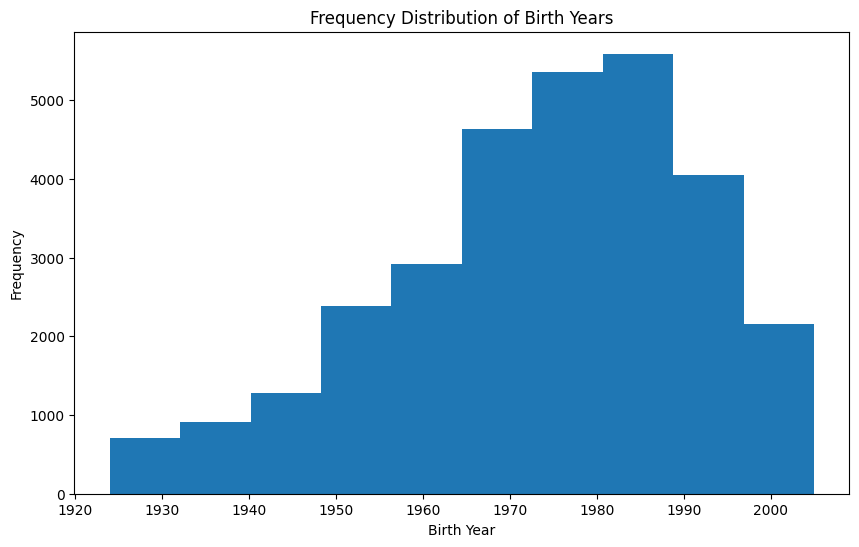

In [431]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_test = test_df['dob_year'].min()
max_dob_year_test = test_df['dob_year'].max()
print('Oldest birth year in test set:', min_dob_year_test)
print('Latest birth year in test set:', max_dob_year_test)

plt.figure(figsize=(10, 6))
plt.hist(test_df['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

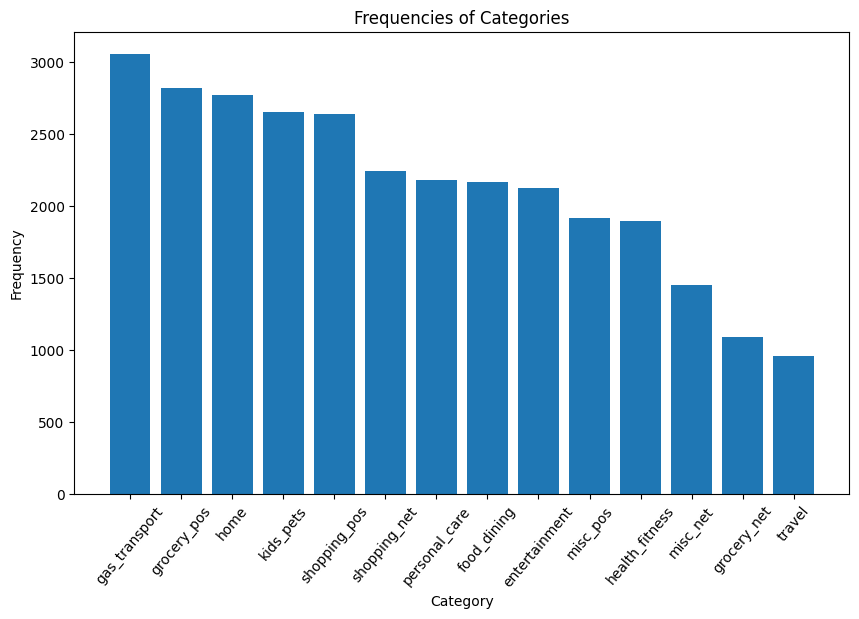

In [432]:
# barplot for category
cat_counts_test = test_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_test.index), cat_counts_test.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

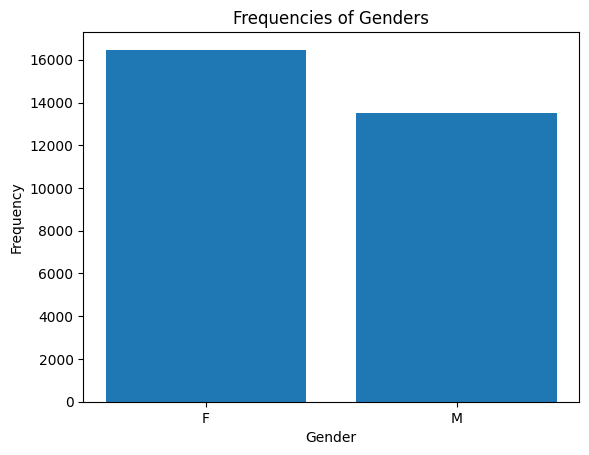

In [433]:
# barplot for gender
gender_counts_test = test_df['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_test.index), gender_counts_test.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

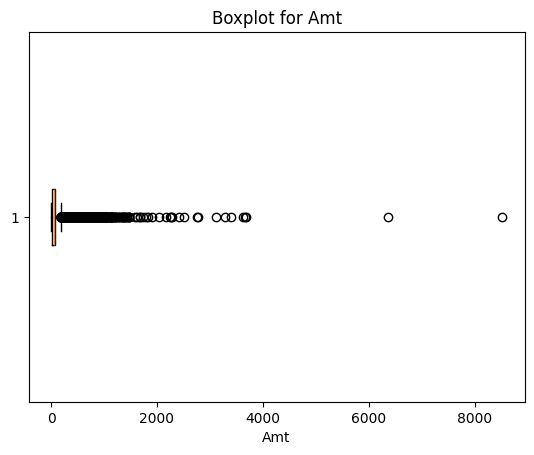

In [434]:
# boxplot for amt
plt.figure()
plt.boxplot(test_df['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

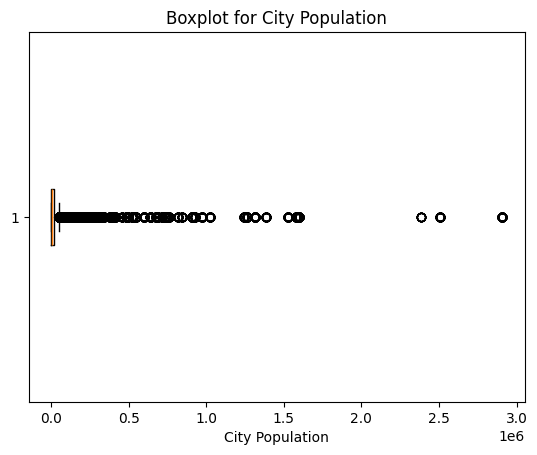

In [435]:
# boxplot for city_pop
plt.figure()
plt.boxplot(test_df['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [436]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in test set:', len(test_df[(test_df['lat'] < -90) | (test_df['lat'] > 90)]))
print('Number of incorrect long in test set:', len(test_df[(test_df['long'] < -180) | (test_df['long'] > 180)]))
print('Number of incorrect merch_lat in test set:', len(test_df[(test_df['merch_lat'] < -90) | (test_df['merch_lat'] > 90)]))
print('Number of incorrect merch_long in test set:', len(test_df[(test_df['merch_long'] < -180) | (test_df['merch_long'] > 180)]))

Number of incorrect lat in test set: 0
Number of incorrect long in test set: 0
Number of incorrect merch_lat in test set: 0
Number of incorrect merch_long in test set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the test set. However, when each value of trans_date_trans_time is converted to its unix timestamp, the derived unix timestamp does not match its corresponding unix_time. Hence, further investigation is needed and we may need to remove the unix_time feature. 

## Breaking Down Datetime Columns
In this section, we will break down the trans_date_trans_time column into 6 columns for the transaction year, month, day, hour, minute, and second.<br>
- These features are more desirable for the machine learning models to learn from as each value is a number. On the other hand, trans_date_trans_time is a datetime type, which is harder for the models to learn from and can lead to model overfitting
 
NOTE: The 'dob' column is already broken down in the outlier analysis section above

#### Train set

In [437]:
# break down trans_date_trans_time column and then remove it, also remove dob
train_df['trans_year'] = train_df['trans_date_trans_time'].dt.year
train_df['trans_month'] = train_df['trans_date_trans_time'].dt.month
train_df['trans_day'] = train_df['trans_date_trans_time'].dt.day
train_df['trans_hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['trans_min'] = train_df['trans_date_trans_time'].dt.minute
train_df['trans_sec'] = train_df['trans_date_trans_time'].dt.second

train_df = train_df.drop(columns=['trans_date_trans_time', 'dob'])

#### Validation set

In [438]:
# break down trans_date_trans_time column and then remove it, also remove dob
validation_df['trans_year'] = validation_df['trans_date_trans_time'].dt.year
validation_df['trans_month'] = validation_df['trans_date_trans_time'].dt.month
validation_df['trans_day'] = validation_df['trans_date_trans_time'].dt.day
validation_df['trans_hour'] = validation_df['trans_date_trans_time'].dt.hour
validation_df['trans_min'] = validation_df['trans_date_trans_time'].dt.minute
validation_df['trans_sec'] = validation_df['trans_date_trans_time'].dt.second

validation_df = validation_df.drop(columns=['trans_date_trans_time', 'dob'])

#### Test set

In [439]:
# break down trans_date_trans_time column and then remove it, also remove dob
test_df['trans_year'] = test_df['trans_date_trans_time'].dt.year
test_df['trans_month'] = test_df['trans_date_trans_time'].dt.month
test_df['trans_day'] = test_df['trans_date_trans_time'].dt.day
test_df['trans_hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['trans_min'] = test_df['trans_date_trans_time'].dt.minute
test_df['trans_sec'] = test_df['trans_date_trans_time'].dt.second

test_df = test_df.drop(columns=['trans_date_trans_time', 'dob'])

## Removing Unnecessary Features
In this section, we will remove certain variables from the train, validation, and test sets. These variables are removed as they either overlap with other features or are not meaningful features and can lead to model overfitting.<br> 
Variables to remove: 'Unnamed: 0', street, zip, trans_num, first, last

#### Train set

In [440]:
train_df = train_df.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

#### Validation set

In [441]:
validation_df = validation_df.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

#### Test set

In [442]:
test_df = test_df.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

## Resampling
In this section, we will resample the train set to handle its class imbalance. Specifically, we will do hybrid resampling where we will first oversample then undersample.

In [443]:
# split train set into X and y, and get initial class counts
y = train_df.pop('is_fraud')
X = train_df

print('Initial is_fraud class counts')
y.value_counts()

Initial is_fraud class counts


is_fraud
0    232668
1      7332
Name: count, dtype: int64

#### Oversampling (RandomOverSampler)

In [444]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_res_over, y_res_over = ros.fit_resample(X, y)

In [445]:
print('Oversampled is_fraud class counts')
y_res_over.value_counts()

Oversampled is_fraud class counts


is_fraud
0    232668
1    116334
Name: count, dtype: int64

In [446]:
# from imblearn.over_sampling import SMOTENC

# sm = SMOTENC(categorical_features=['merchant', 'category', 'first', 'last', 'gender', 'city', 'state', 'job', 'trans_num'], random_state=42, sampling_strategy=0.5)
# X_res_smote, y_res_smote = sm.fit_resample(X, y)

In [447]:
# print('Oversampled is_fraud class counts')
# y_res_smote.value_counts()

#### Undersampling (RandomUnderSampler)

In [448]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res_under, y_res_under = rus.fit_resample(X_res_over, y_res_over)

In [449]:
print('Undersampled is_fraud class counts')
y_res_under.value_counts()

Undersampled is_fraud class counts


is_fraud
0    116334
1    116334
Name: count, dtype: int64

In [450]:
# from imblearn.under_sampling import NearMiss

# nm = NearMiss(sampling_strategy=1)
# X_res_nm, y_res_nm = nm.fit_resample(X_res_over, y_res_over)

In [451]:
# print('Undersampled is_fraud class counts')
# y_res_nm.value_counts()

#### Creating dataframe for resampled train set

In [452]:
X_res_under['is_fraud'] = y_res_under
train_df = X_res_under
train_df = train_df.reset_index(drop=True)
train_df

cc_num                          merchant       category  \
0       4861310130652566408                   fraud_Auer-West   shopping_net   
1          3501509250702469   fraud_Ruecker, Beer and Collier   shopping_net   
2          3506042666828517              fraud_Hilpert-Conroy      kids_pets   
3          5388659976630693  fraud_Stroman, Hudson and Erdman  gas_transport   
4           180048185037117              fraud_Murray-Smitham    grocery_pos   
...                     ...                               ...            ...   
232663       30501624614310                 fraud_Shields Inc    grocery_net   
232664         676308307625                fraud_Kris-Weimann       misc_net   
232665  4855488158131690372             fraud_Vandervort-Funk    grocery_pos   
232666     3541554378551366                fraud_Medhurst PLC   shopping_net   
232667     4670613943676271            fraud_Koelpin and Sons       misc_net   

            amt gender           city state      lat      long  city_pop  \
0          1.17      F    Saint Amant    LA  30.2385  -90.8435     10076   
1          8.65      M         Naples    FL  26.1184  -81.7361    276002   
2         10.50      F        Comfort    WV  38.1372  -81.5962       630   
3         81.59      M         Seneca    WI  43.2064  -90.9405       153   
4        211.87      F     Plainfield    NJ  40.6152  -74.4150     71485   
...         ...    ...            ...   ...      ...       ...       ...   
232663     6.68      F         Scotia    SC  32.6786  -81.2455       302   
232664   850.18      M  Washoe Valley    NV  39.2669 -119.8174      4290   
232665   286.51      M   Graniteville    VT  44.1554  -72.4847       970   
232666  1134.36      F        Hampton    VA  37.0462  -76.4096    136895   
232667   788.20      F       Cuthbert    GA  31.7706  -84.7936      5726   

                                                  job   unix_time  merch_lat  \
0                            Surveyor, rural practice  1361145004  29.973209   
1       Programme researcher, broadcasting/film/video  1344526115  25.887077   
2                                         Fine artist  1338912205  37.146606   
3                                   Quantity surveyor  1352199079  42.358517   
4                              Leisure centre manager  1344673103  40.055180   
...                                               ...         ...        ...   
232663                       Magazine features editor  1331177701  33.062076   
232664                            Animal nutritionist  1346469135  39.726418   
232665                        Agricultural consultant  1363112501  44.546807   
232666                          Accounting technician  1327017460  36.128777   
232667                         Fitness centre manager  1338986412  30.862789   

        merch_long  dob_year  dob_month  dob_day  trans_year  trans_month  \
0       -90.617086      1977         12       16        2020            2   
1       -81.564535      1979          1        2        2019            8   
2       -81.619032      1959          7       30        2019            6   
3       -91.763561      1962          2       14        2019           11   
4       -74.132404      1974          7       19        2019            8   
...            ...       ...        ...      ...         ...          ...   
232663  -81.743136      1973          5        4        2019            3   
232664 -118.927284      1989         12       10        2019            9   
232665  -73.339106      1993          9       29        2020            3   
232666  -76.974768      1939          9       19        2019            1   
232667  -84.368847      1947          8       14        2019            6   

        trans_day  trans_hour  trans_min  trans_sec  is_fraud  
0              17          23         50          4         0  
1               9          15         28         35         0  
2               5          16          3         25         0  
3    

## Scaling
In this section, we will scale certain features in the train, validation, and test sets.<br>
Variables to scale: amt, unix_time, city_pop

#### Train set

In [453]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# filter for numerical features and scale them
scaled_train = train_df[['amt', 'unix_time', 'city_pop']]
scaled_train = scaler.fit_transform(scaled_train)
scaled_train_df = pd.DataFrame(scaled_train, columns=['amt', 'unix_time', 'city_pop'])

In [454]:
# replace columns in train_df with the corresponding scaled columns in scaled_train_df
train_df = train_df.drop(columns=['amt', 'unix_time', 'city_pop'])
train_df = train_df.join(scaled_train_df, how='inner')
train_df

cc_num                          merchant       category  \
0       4861310130652566408                   fraud_Auer-West   shopping_net   
1          3501509250702469   fraud_Ruecker, Beer and Collier   shopping_net   
2          3506042666828517              fraud_Hilpert-Conroy      kids_pets   
3          5388659976630693  fraud_Stroman, Hudson and Erdman  gas_transport   
4           180048185037117              fraud_Murray-Smitham    grocery_pos   
...                     ...                               ...            ...   
232663       30501624614310                 fraud_Shields Inc    grocery_net   
232664         676308307625                fraud_Kris-Weimann       misc_net   
232665  4855488158131690372             fraud_Vandervort-Funk    grocery_pos   
232666     3541554378551366                fraud_Medhurst PLC   shopping_net   
232667     4670613943676271            fraud_Koelpin and Sons       misc_net   

       gender           city state      lat      long  \
0           F    Saint Amant    LA  30.2385  -90.8435   
1           M         Naples    FL  26.1184  -81.7361   
2           F        Comfort    WV  38.1372  -81.5962   
3           M         Seneca    WI  43.2064  -90.9405   
4           F     Plainfield    NJ  40.6152  -74.4150   
...       ...            ...   ...      ...       ...   
232663      F         Scotia    SC  32.6786  -81.2455   
232664      M  Washoe Valley    NV  39.2669 -119.8174   
232665      M   Graniteville    VT  44.1554  -72.4847   
232666      F        Hampton    VA  37.0462  -76.4096   
232667      F       Cuthbert    GA  31.7706  -84.7936   

                                                  job  merch_lat  merch_long  \
0                            Surveyor, rural practice  29.973209  -90.617086   
1       Programme researcher, broadcasting/film/video  25.887077  -81.564535   
2                                         Fine artist  37.146606  -81.619032   
3                                   Quantity surveyor  42.358517  -91.763561   
4                              Leisure centre manager  40.055180  -74.132404   
...                                               ...        ...         ...   
232663                       Magazine features editor  33.062076  -81.743136   
232664                            Animal nutritionist  39.726418 -118.927284   
232665                        Agricultural consultant  44.546807  -73.339106   
232666                          Accounting technician  36.128777  -76.974768   
232667                         Fitness centre manager  30.862789  -84.368847   

        dob_year  dob_month  dob_day  trans_year  trans_month  trans_day  \
0           1977         12       16        2020            2         17   
1           1979          1        2        2019            8          9   
2           1959          7       30        2019            6          5   
3           1962          2       14        2019           11          6   
4           1974          7       19        2019            8         11   
...          ...        ...      ...         ...          ...        ...   
232663      1973          5        4        2019            3          8   
232664      1989         12       10        2019            9          1   
232665      1993          9       29        2020            3         12   
232666      1939          9       19        2019            1         19   
232667      1947          8       14        2019            6          6   

        trans_hour  trans_min  trans_sec  is_fraud       amt  unix_time  \
0               23         50          4         0  0.000011   0.770206   
1               15         28         35         0  0.000508   0.412355   
2               16          3         25         0  0.000631   0.291471   
3               10         51         19         0  0.005356   0.577575   
4                8         18         23         0  0.014015   0.415520   
...            ...        ...        ...       ... 

#### Validation set

In [455]:
# filter for numerical features and scale them
scaled_valid = validation_df[['amt', 'unix_time', 'city_pop']]
scaled_valid = scaler.transform(scaled_valid)
scaled_valid_df = pd.DataFrame(scaled_valid, columns=['amt', 'unix_time', 'city_pop'])

In [456]:
# replace columns in validation_df with the corresponding scaled columns in scaled_valid_df
validation_df = validation_df.drop(columns=['amt', 'unix_time', 'city_pop'])
validation_df = validation_df.join(scaled_valid_df, how='inner')
validation_df

cc_num                                merchant  \
0      4906628655840914250                        fraud_Feil-Morar   
1             571365235126                  fraud_Jakubowski Group   
2            4755696071492                      fraud_Erdman-Ebert   
3          370612217861404  fraud_Greenholt, O'Hara and Balistreri   
4         4378993458389626     fraud_Schneider, Hayes and Nikolaus   
...                    ...                                     ...   
29995      377026671291680     fraud_Mosciski, Ziemann and Farrell   
29996     5501083170975659   fraud_McCullough, Hudson and Schuster   
29997      213148039875802                      fraud_Miller-Hauck   
29998     3535808924394848                     fraud_Rolfson-Kunde   
29999     4155021259183870    fraud_Streich, Rolfson and Wilderman   

             category gender            city state      lat     long  \
0      health_fitness      M        Key West    FL  24.6557 -81.3824   
1         food_dining      F         Elberta    MI  44.5995 -86.2141   
2       personal_care      M          Sachse    TX  32.9643 -96.6012   
3        shopping_net      F         Bristol    PA  40.1159 -74.8536   
4         food_dining      M          Conway    NH  43.9742 -71.1503   
...               ...    ...             ...   ...      ...      ...   
29995    shopping_net      F         Redford    MO  37.3272 -91.0243   
29996     food_dining      M  Cuyahoga Falls    OH  41.1464 -81.5107   
29997     grocery_pos      F         Brandon    FL  27.9551 -82.2966   
29998   personal_care      M      Tower Hill    IL  39.3900 -88.9597   
29999       kids_pets      F   Mountain Park    OK  34.7032 -98.9591   

                                                    job  merch_lat  \
0                                          Town planner  25.512218   
1                   Exhibitions officer, museum/gallery  44.034668   
2                                         Site engineer  32.598802   
3      Administrator, charities/voluntary organisations  39.889060   
4                                               Surgeon  43.643013   
...                                                 ...        ...   
29995                                Investment analyst  36.489105   
29996                                   Equities trader  40.890814   
29997                          Environmental consultant  28.457183   
29998                         Radio broadcast assistant  40.291688   
29999                Research scientist (life sciences)  34.624869   

       merch_long  is_fraud  dob_year  dob_month  dob_day  trans_year  \
0      -82.292661         0      1987          2       13        2020   
1      -85.607445         0      1995          7       12        2019   
2      -96.689835         0      1985          6       20        2019   
3      -75.542567         0      1985          5       25        2020   
4      -70.210856         0      1999         10       25        2019   
...           ...       ...       ...        ...      ...         ...   
29995  -91.490362         0      1974         10       27        2019   
29996  -80.648953         0      1966          1        4        2020   
29997  -81.521990         0      1978         11       30        2020   
29998  -89.521832         0      1980          1        9        2019   
29999  -99.008428         0      1983         10       12        2019   

       trans_month  trans_day  trans_hour  trans_min  trans_sec       amt  \
0                3          3          14         32         35  0.018751   
1               12         30          21         32         22  0.000370   
2               12         19          23         13         48  0.000746   
3                1         19          14         48         11  0.000356   
4                5         11          13         45         14  0.000128   
...            ...        ...         ...        ...        ...       ...   
29995            1         27          16         48     

#### Test set

In [457]:
# filter for numerical features and scale them
scaled_test = test_df[['amt', 'unix_time', 'city_pop']]
scaled_test = scaler.transform(scaled_test)
scaled_test_df = pd.DataFrame(scaled_test, columns=['amt', 'unix_time', 'city_pop'])

In [458]:
# replace columns in test_df with the corresponding scaled columns in scaled_test_df
test_df = test_df.drop(columns=['amt', 'unix_time', 'city_pop'])
test_df = test_df.join(scaled_test_df, how='inner')
test_df

cc_num                                     merchant  \
0      3566094707272327                 fraud_Hintz, Bauch and Smith   
1      2610529083834453                      fraud_Hackett-Lueilwitz   
2      4873783502705038                       fraud_Bahringer-Larson   
3      5540636818935089                       fraud_Jakubowski Group   
4       213163860545705              fraud_Lowe, Dietrich and Erdman   
...                 ...                                          ...   
29995      630441765090                               fraud_Wolf Inc   
29996   377234009633447                            fraud_Kerluke Inc   
29997     4383521454815                       fraud_Little-Gleichner   
29998   180058696935600  fraud_Klocko, Runolfsdottir and Breitenberg   
29999   377113842678100                       fraud_Denesik and Sons   

             category gender                 city state      lat      long  \
0      health_fitness      F              Newhall    CA  34.3795 -118.5230   
1         grocery_pos      F          Old Hickory    TN  36.2416  -86.6117   
2         grocery_net      F           Burlington    WA  48.4786 -122.3345   
3         food_dining      M             Lawrence    MA  42.6911  -71.1605   
4           kids_pets      M                Avera    GA  33.1410  -82.5150   
...               ...    ...                  ...   ...      ...       ...   
29995     grocery_pos      F                  May    TX  31.9571  -98.9656   
29996        misc_net      F  Shenandoah Junction    WV  39.3716  -77.8229   
29997          travel      M         Indianapolis    IN  39.9347  -86.1633   
29998  health_fitness      M            De Lancey    NY  42.1890  -74.9229   
29999    shopping_pos      M            Greenwich    NJ  39.4055  -75.3209   

                               job  merch_lat  merch_long  is_fraud  dob_year  \
0                 Health physicist  34.809923 -118.111582         0      1971   
1                   Prison officer  36.644354  -87.480427         0      1994   
2             Public house manager  48.784813 -123.198143         0      1974   
3                     Geoscientist  42.893355  -70.856259         0      1985   
4        Claims inspector/assessor  33.597864  -83.314567         0      1986   
...                            ...        ...         ...       ...       ...   
29995  Corporate investment banker  31.893596  -99.869799         0      1965   
29996            Systems developer  40.370968  -77.905729         0      1966   
29997           Academic librarian  39.985792  -86.364391         0      1987   
29998         Chartered accountant  42.298048  -74.986771         0      2000   
29999      Insurance risk surveyor  40.161859  -75.233355         0      1965   

       dob_month  dob_day  trans_year  trans_month  trans_day  trans_hour  \
0              4       25        2020           10         19          12   
1              7       27        2020            8         13           5   
2              3       10        2020            8         26           5   
3              4        4        2020            9         20          18   
4              4       28        2020           12         16          13   
...          ...      ...         ...          ...        ...         ...   
29995          7       26        2020           11          3           8   
29996          2       14        2020            7         26           4   
29997          9       22        2020           12          8          21   
29998          8       28        2020           11         20          17   
29999          3       25        2020            8         16           8   

       trans_min  trans_sec       amt  unix_time  city_pop  
0             30         31  0.002465   1.223274  0.011993  
1             57         47  0.013654   1.098117  0.007627  
2              6         42  0.003374   1.122237  0.005108  
3             44         30  0.005874   1.169805  0.026271  
4           

## Encoding
In this section, we will apply encoding on the train, validation, and test sets.<br>
Variables to encode: merchant, category, gender, city, state

#### Train set

In [459]:
from feature_engine.encoding import CountFrequencyEncoder

# frequency encode 'merchant', 'city', 'state'
freq_encoder = CountFrequencyEncoder(
    encoding_method='frequency',
    variables=['merchant', 'city', 'state']
    )

train_df = freq_encoder.fit_transform(train_df)

train_df

cc_num  merchant       category gender      city  \
0       4861310130652566408  0.002540   shopping_net      F  0.000984   
1          3501509250702469  0.002287   shopping_net      M  0.003576   
2          3506042666828517  0.001380      kids_pets      F  0.001582   
3          5388659976630693  0.001711  gas_transport      M  0.001543   
4           180048185037117  0.003447    grocery_pos      F  0.002231   
...                     ...       ...            ...    ...       ...   
232663       30501624614310  0.000636    grocery_net      F  0.001723   
232664         676308307625  0.001517       misc_net      M  0.001027   
232665  4855488158131690372  0.004169    grocery_pos      M  0.001775   
232666     3541554378551366  0.003099   shopping_net      F  0.001689   
232667     4670613943676271  0.001943       misc_net      F  0.000825   

           state      lat      long  \
0       0.014046  30.2385  -90.8435   
1       0.034779  26.1184  -81.7361   
2       0.019255  38.1372  -81.5962   
3       0.021825  43.2064  -90.9405   
4       0.017862  40.6152  -74.4150   
...          ...      ...       ...   
232663  0.024477  32.6786  -81.2455   
232664  0.005110  39.2669 -119.8174   
232665  0.009451  44.1554  -72.4847   
232666  0.024206  37.0462  -76.4096   
232667  0.019599  31.7706  -84.7936   

                                                  job  merch_lat  merch_long  \
0                            Surveyor, rural practice  29.973209  -90.617086   
1       Programme researcher, broadcasting/film/video  25.887077  -81.564535   
2                                         Fine artist  37.146606  -81.619032   
3                                   Quantity surveyor  42.358517  -91.763561   
4                              Leisure centre manager  40.055180  -74.132404   
...                                               ...        ...         ...   
232663                       Magazine features editor  33.062076  -81.743136   
232664                            Animal nutritionist  39.726418 -118.927284   
232665                        Agricultural consultant  44.546807  -73.339106   
232666                          Accounting technician  36.128777  -76.974768   
232667                         Fitness centre manager  30.862789  -84.368847   

        dob_year  dob_month  dob_day  trans_year  trans_month  trans_day  \
0           1977         12       16        2020            2         17   
1           1979          1        2        2019            8          9   
2           1959          7       30        2019            6          5   
3           1962          2       14        2019           11          6   
4           1974          7       19        2019            8         11   
...          ...        ...      ...         ...          ...        ...   
232663      1973          5        4        2019            3          8   
232664      1989         12       10        2019            9          1   
232665      1993          9       29        2020            3         12   
232666      1939          9       19        2019            1         19   
232667      1947          8       14        2019            6          6   

        trans_hour  trans_min  trans_sec  is_fraud       amt  unix_time  \
0               23         50          4         0  0.000011   0.770206   
1               15         28         35         0  0.000508   0.412355   
2               16          3         25         0  0.000631   0.291471   
3               10         51         19         0  0.005356   0.577575   
4                8         18         23         0  0.014015   0.415520   
...            ...        ...        ...       ...       ...        ...   
232663           3         35          1         1  0.000378   0.124926   
232664           3         12         15         1  0.056439   0.454193   
232665          18         21         41         1  0.018976   0.812572   
232666          23         57         40         1 

In [460]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# filter for categorical features and one-hot encode them
encoded_train = train_df[['category', 'gender']]
encoded_train = enc.fit_transform(encoded_train)
encoded_train_array = encoded_train.toarray()
encoded_train_df = pd.DataFrame(encoded_train_array, columns=enc.get_feature_names_out())
encoded_train_df

category_entertainment  category_food_dining  category_gas_transport  \
0                          0.0                   0.0                     0.0   
1                          0.0                   0.0                     0.0   
2                          0.0                   0.0                     0.0   
3                          0.0                   0.0                     1.0   
4                          0.0                   0.0                     0.0   
...                        ...                   ...                     ...   
232663                     0.0                   0.0                     0.0   
232664                     0.0                   0.0                     0.0   
232665                     0.0                   0.0                     0.0   
232666                     0.0                   0.0                     0.0   
232667                     0.0                   0.0                     0.0   

        category_grocery_net  category_grocery_pos  category_health_fitness  \
0                        0.0                   0.0                      0.0   
1                        0.0                   0.0                      0.0   
2                        0.0                   0.0                      0.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   1.0                      0.0   
...                      ...                   ...                      ...   
232663                   1.0                   0.0                      0.0   
232664                   0.0                   0.0                      0.0   
232665                   0.0                   1.0                      0.0   
232666                   0.0                   0.0                      0.0   
232667                   0.0                   0.0                      0.0   

        category_home  category_kids_pets  category_misc_net  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 1.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   
...               ...                 ...                ...   
232663            0.0                 0.0                0.0   
232664            0.0                 0.0                1.0   
232665            0.0                 0.0                0.0   
232666            0.0                 0.0                0.0   
232667            0.0                 0.0                1.0   

        category_misc_pos  category_personal_care  category_shopping_net  \
0                     0.0                     0.0                    1.0   
1                     0.0                     0.0                    1.0   
2                     0.0                     0.0                    0.0   
3                     0.0                     0.0                    0.0   
4                     0.0                     0.0                    0.0   
...                   ...                     ...                    ...   
232663                0.0                     0.0                    0.0   
232664                0.0                     0.0                    0.0   
232665                0.0                     0.0                    0.0   
232666                0.0                     0.0                    1.0   
232667                0.0                     0.0                    0.0   

        category_shopping_pos  category_travel  gender_F  gender_M  
0                         0.0              0.0       1.0       0.0  
1                         0.0              0.0       0.0       1.0  
2                         0.0              0.0       1.0       0.0  
3                         0.0              0.0       0.0       1.0  
4                         0.0              0.0       1.0       0.0  
..

In [461]:
import scipy

# join encoded_train_df with the remaining train_df
remaining_train_df = train_df[train_df.columns.difference(['category', 'gender'])]
target_col_train = remaining_train_df.pop('is_fraud')
remaining_train_df['is_fraud'] = target_col_train

# remaining_train_sparse = scipy.sparse.csr_matrix(remaining_train_df.values)
# train_df1 = scipy.sparse.hstack([encoded_train, remaining_train_sparse])
train_df1 = encoded_train_df.join(remaining_train_df, how='inner')
train_df1

category_entertainment  category_food_dining  category_gas_transport  \
0                          0.0                   0.0                     0.0   
1                          0.0                   0.0                     0.0   
2                          0.0                   0.0                     0.0   
3                          0.0                   0.0                     1.0   
4                          0.0                   0.0                     0.0   
...                        ...                   ...                     ...   
232663                     0.0                   0.0                     0.0   
232664                     0.0                   0.0                     0.0   
232665                     0.0                   0.0                     0.0   
232666                     0.0                   0.0                     0.0   
232667                     0.0                   0.0                     0.0   

        category_grocery_net  category_grocery_pos  category_health_fitness  \
0                        0.0                   0.0                      0.0   
1                        0.0                   0.0                      0.0   
2                        0.0                   0.0                      0.0   
3                        0.0                   0.0                      0.0   
4                        0.0                   1.0                      0.0   
...                      ...                   ...                      ...   
232663                   1.0                   0.0                      0.0   
232664                   0.0                   0.0                      0.0   
232665                   0.0                   1.0                      0.0   
232666                   0.0                   0.0                      0.0   
232667                   0.0                   0.0                      0.0   

        category_home  category_kids_pets  category_misc_net  \
0                 0.0                 0.0                0.0   
1                 0.0                 0.0                0.0   
2                 0.0                 1.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                0.0   
...               ...                 ...                ...   
232663            0.0                 0.0                0.0   
232664            0.0                 0.0                1.0   
232665            0.0                 0.0                0.0   
232666            0.0                 0.0                0.0   
232667            0.0                 0.0                1.0   

        category_misc_pos  category_personal_care  category_shopping_net  \
0                     0.0                     0.0                    1.0   
1                     0.0                     0.0                    1.0   
2                     0.0                     0.0                    0.0   
3                     0.0                     0.0                    0.0   
4                     0.0                     0.0                    0.0   
...                   ...                     ...                    ...   
232663                0.0                     0.0                    0.0   
232664                0.0                     0.0                    0.0   
232665                0.0                     0.0                    0.0   
232666                0.0                     0.0                    1.0   
232667                0.0                     0.0                    0.0   

        category_shopping_pos  category_travel  gender_F  gender_M       amt  \
0                         0.0              0.0       1.0       0.0  0.000011   
1                         0.0              0.0       0.0       1.0  0.000508   
2                         0.0              0.0       1.0       0.0  0.000631   
3                         0.0              0.0       0.0       1.0  0.005356   
4               

#### Validation set

In [462]:
# frequency encode 'merchant', 'city', 'state'

validation_df = freq_encoder.transform(validation_df)

validation_df

cc_num  merchant        category gender      city  \
0      4906628655840914250  0.000808  health_fitness      M  0.001698   
1             571365235126  0.000830     food_dining      F  0.001788   
2            4755696071492  0.001023   personal_care      M  0.001079   
3          370612217861404  0.003180    shopping_net      F  0.000567   
4         4378993458389626  0.001092     food_dining      M  0.003086   
...                    ...       ...             ...    ...       ...   
29995      377026671291680  0.003185    shopping_net      F  0.001663   
29996     5501083170975659  0.000915     food_dining      M  0.001079   
29997      213148039875802  0.003039     grocery_pos      F  0.003034   
29998     3535808924394848  0.001083   personal_care      M  0.000576   
29999     4155021259183870  0.001285       kids_pets      F  0.001341   

          state      lat     long  \
0      0.034779  24.6557 -81.3824   
1      0.033748  44.5995 -86.2141   
2      0.068462  32.9643 -96.6012   
3      0.061770  40.1159 -74.8536   
4      0.007380  43.9742 -71.1503   
...         ...      ...      ...   
29995  0.027571  37.3272 -91.0243   
29996  0.038355  41.1464 -81.5107   
29997  0.034779  27.9551 -82.2966   
29998  0.032978  39.3900 -88.9597   
29999  0.019539  34.7032 -98.9591   

                                                    job  merch_lat  \
0                                          Town planner  25.512218   
1                   Exhibitions officer, museum/gallery  44.034668   
2                                         Site engineer  32.598802   
3      Administrator, charities/voluntary organisations  39.889060   
4                                               Surgeon  43.643013   
...                                                 ...        ...   
29995                                Investment analyst  36.489105   
29996                                   Equities trader  40.890814   
29997                          Environmental consultant  28.457183   
29998                         Radio broadcast assistant  40.291688   
29999                Research scientist (life sciences)  34.624869   

       merch_long  dob_year  dob_month  dob_day  trans_year  trans_month  \
0      -82.292661      1987          2       13        2020            3   
1      -85.607445      1995          7       12        2019           12   
2      -96.689835      1985          6       20        2019           12   
3      -75.542567      1985          5       25        2020            1   
4      -70.210856      1999         10       25        2019            5   
...           ...       ...        ...      ...         ...          ...   
29995  -91.490362      1974         10       27        2019            1   
29996  -80.648953      1966          1        4        2020            2   
29997  -81.521990      1978         11       30        2020            3   
29998  -89.521832      1980          1        9        2019            7   
29999  -99.008428      1983         10       12        2019            6   

       trans_day  trans_hour  trans_min  trans_sec  is_fraud       amt  \
0              3          14         32         35         0  0.018751   
1             30          21         32         22         0  0.000370   
2             19          23         13         48         0  0.000746   
3             19          14         48         11         0  0.000356   
4             11          13         45         14         0  0.000128   
...          ...         ...        ...        ...       ...       ...   
29995         27          16         48         53         0  0.000108   
29996         16           3          4         59         0  0.002219   
29997          8           5         22         23         0  0.011959   
29998         28          19          7         55         0  0.004884   
29999         22          17         21         39         0  0.006861   

       unix_time  city_pop  
0       0.795532  0.011308

In [463]:
# filter for categorical features and one-hot encode them
encoded_valid = validation_df[['category', 'gender']]
encoded_valid = enc.transform(encoded_valid)
encoded_valid_array = encoded_valid.toarray()
encoded_valid_df = pd.DataFrame(encoded_valid_array, columns=enc.get_feature_names_out())
encoded_valid_df

category_entertainment  category_food_dining  category_gas_transport  \
0                         0.0                   0.0                     0.0   
1                         0.0                   1.0                     0.0   
2                         0.0                   0.0                     0.0   
3                         0.0                   0.0                     0.0   
4                         0.0                   1.0                     0.0   
...                       ...                   ...                     ...   
29995                     0.0                   0.0                     0.0   
29996                     0.0                   1.0                     0.0   
29997                     0.0                   0.0                     0.0   
29998                     0.0                   0.0                     0.0   
29999                     0.0                   0.0                     0.0   

       category_grocery_net  category_grocery_pos  category_health_fitness  \
0                       0.0                   0.0                      1.0   
1                       0.0                   0.0                      0.0   
2                       0.0                   0.0                      0.0   
3                       0.0                   0.0                      0.0   
4                       0.0                   0.0                      0.0   
...                     ...                   ...                      ...   
29995                   0.0                   0.0                      0.0   
29996                   0.0                   0.0                      0.0   
29997                   0.0                   1.0                      0.0   
29998                   0.0                   0.0                      0.0   
29999                   0.0                   0.0                      0.0   

       category_home  category_kids_pets  category_misc_net  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2                0.0                 0.0                0.0   
3                0.0                 0.0                0.0   
4                0.0                 0.0                0.0   
...              ...                 ...                ...   
29995            0.0                 0.0                0.0   
29996            0.0                 0.0                0.0   
29997            0.0                 0.0                0.0   
29998            0.0                 0.0                0.0   
29999            0.0                 1.0                0.0   

       category_misc_pos  category_personal_care  category_shopping_net  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     1.0                    0.0   
3                    0.0                     0.0                    1.0   
4                    0.0                     0.0                    0.0   
...                  ...                     ...                    ...   
29995                0.0                     0.0                    1.0   
29996                0.0                     0.0                    0.0   
29997                0.0                     0.0                    0.0   
29998                0.0                     1.0                    0.0   
29999                0.0                     0.0                    0.0   

       category_shopping_pos  category_travel  gender_F  gender_M  
0                        0.0              0.0       0.0       1.0  
1                        0.0              0.0       1.0       0.0  
2                        0.0              0.0       0.0       1.0  
3                        0.0              0.0       1.0       0.0  
4                        0.0              0.0       0.0       1.0  
...                      ...              ...       ...

In [464]:
# join encoded_valid_df with the remaining validation_df
remaining_valid_df = validation_df[validation_df.columns.difference(['category', 'gender'])]
target_col_valid = remaining_valid_df.pop('is_fraud')
remaining_valid_df['is_fraud'] = target_col_valid

# remaining_valid_sparse = scipy.sparse.csr_matrix(remaining_valid_df.values)
# validation_df1 = scipy.sparse.hstack([encoded_valid, remaining_valid_sparse])
validation_df1 = encoded_valid_df.join(remaining_valid_df, how='inner')
validation_df1

category_entertainment  category_food_dining  category_gas_transport  \
0                         0.0                   0.0                     0.0   
1                         0.0                   1.0                     0.0   
2                         0.0                   0.0                     0.0   
3                         0.0                   0.0                     0.0   
4                         0.0                   1.0                     0.0   
...                       ...                   ...                     ...   
29995                     0.0                   0.0                     0.0   
29996                     0.0                   1.0                     0.0   
29997                     0.0                   0.0                     0.0   
29998                     0.0                   0.0                     0.0   
29999                     0.0                   0.0                     0.0   

       category_grocery_net  category_grocery_pos  category_health_fitness  \
0                       0.0                   0.0                      1.0   
1                       0.0                   0.0                      0.0   
2                       0.0                   0.0                      0.0   
3                       0.0                   0.0                      0.0   
4                       0.0                   0.0                      0.0   
...                     ...                   ...                      ...   
29995                   0.0                   0.0                      0.0   
29996                   0.0                   0.0                      0.0   
29997                   0.0                   1.0                      0.0   
29998                   0.0                   0.0                      0.0   
29999                   0.0                   0.0                      0.0   

       category_home  category_kids_pets  category_misc_net  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2                0.0                 0.0                0.0   
3                0.0                 0.0                0.0   
4                0.0                 0.0                0.0   
...              ...                 ...                ...   
29995            0.0                 0.0                0.0   
29996            0.0                 0.0                0.0   
29997            0.0                 0.0                0.0   
29998            0.0                 0.0                0.0   
29999            0.0                 1.0                0.0   

       category_misc_pos  category_personal_care  category_shopping_net  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     1.0                    0.0   
3                    0.0                     0.0                    1.0   
4                    0.0                     0.0                    0.0   
...                  ...                     ...                    ...   
29995                0.0                     0.0                    1.0   
29996                0.0                     0.0                    0.0   
29997                0.0                     0.0                    0.0   
29998                0.0                     1.0                    0.0   
29999                0.0                     0.0                    0.0   

       category_shopping_pos  category_travel  gender_F  gender_M       amt  \
0                        0.0              0.0       0.0       1.0  0.018751   
1                        0.0              0.0       1.0       0.0  0.000370   
2                        0.0              0.0       0.0       1.0  0.000746   
3                        0.0              0.0       1.0       0.0  0.000356   
4                        0.0              0.0       0.0       1.0  0

#### Test set

In [465]:
# frequency encode 'merchant', 'city', 'state'

test_df = freq_encoder.transform(test_df)

test_df

cc_num  merchant        category gender      city     state  \
0      3566094707272327  0.000765  health_fitness      F  0.001268  0.044355   
1      2610529083834453  0.002794     grocery_pos      F  0.001117  0.015864   
2      4873783502705038  0.000408     grocery_net      F  0.001281  0.014102   
3      5540636818935089  0.000830     food_dining      M  0.001908  0.009486   
4       213163860545705  0.001057       kids_pets      M  0.000915  0.019599   
...                 ...       ...             ...    ...       ...       ...   
29995      630441765090  0.002897     grocery_pos      F  0.001001  0.068462   
29996   377234009633447  0.001723        misc_net      F  0.001595  0.019255   
29997     4383521454815  0.000413          travel      M  0.002579  0.019663   
29998   180058696935600  0.000748  health_fitness      M  0.000808  0.069606   
29999   377113842678100  0.002097    shopping_pos      M  0.001199  0.017862   

           lat      long                          job  merch_lat  merch_long  \
0      34.3795 -118.5230             Health physicist  34.809923 -118.111582   
1      36.2416  -86.6117               Prison officer  36.644354  -87.480427   
2      48.4786 -122.3345         Public house manager  48.784813 -123.198143   
3      42.6911  -71.1605                 Geoscientist  42.893355  -70.856259   
4      33.1410  -82.5150    Claims inspector/assessor  33.597864  -83.314567   
...        ...       ...                          ...        ...         ...   
29995  31.9571  -98.9656  Corporate investment banker  31.893596  -99.869799   
29996  39.3716  -77.8229            Systems developer  40.370968  -77.905729   
29997  39.9347  -86.1633           Academic librarian  39.985792  -86.364391   
29998  42.1890  -74.9229         Chartered accountant  42.298048  -74.986771   
29999  39.4055  -75.3209      Insurance risk surveyor  40.161859  -75.233355   

       dob_year  dob_month  dob_day  trans_year  trans_month  trans_day  \
0          1971          4       25        2020           10         19   
1          1994          7       27        2020            8         13   
2          1974          3       10        2020            8         26   
3          1985          4        4        2020            9         20   
4          1986          4       28        2020           12         16   
...         ...        ...      ...         ...          ...        ...   
29995      1965          7       26        2020           11          3   
29996      1966          2       14        2020            7         26   
29997      1987          9       22        2020           12          8   
29998      2000          8       28        2020           11         20   
29999      1965          3       25        2020            8         16   

       trans_hour  trans_min  trans_sec  is_fraud       amt  unix_time  \
0              12         30         31         0  0.002465   1.223274   
1               5         57         47         0  0.013654   1.098117   
2               5          6         42         0  0.003374   1.122237   
3              18         44         30         0  0.005874   1.169805   
4              13         22         16         0  0.002706   1.331246   
...           ...        ...        ...       ...       ...        ...   
29995           8         28         32         0  0.008623   1.250868   
29996           4         21         58         0  0.017958   1.064506   
29997          21          6         20         0  0.000451   1.316962   
29998          17         14         58         0  0.000130   1.283175   
29999           8         26         27         0  0.000065   1.103891   

       city_pop  
0      0.011993  
1      0.007627  
2      0.005108  
3      0.026271  
4      0.000247  
...         ...  
29995  0.000608  
29996  0.000654  
29997  0.313115  
29998  0.000261  
29999  0.000269  

[30000 rows x 24 columns]

In [466]:
# filter for categorical features and one-hot encode them
encoded_test = test_df[['category', 'gender']]
encoded_test = enc.transform(encoded_test)
encoded_test_array = encoded_test.toarray()
encoded_test_df = pd.DataFrame(encoded_test_array, columns=enc.get_feature_names_out())
encoded_test_df

category_entertainment  category_food_dining  category_gas_transport  \
0                         0.0                   0.0                     0.0   
1                         0.0                   0.0                     0.0   
2                         0.0                   0.0                     0.0   
3                         0.0                   1.0                     0.0   
4                         0.0                   0.0                     0.0   
...                       ...                   ...                     ...   
29995                     0.0                   0.0                     0.0   
29996                     0.0                   0.0                     0.0   
29997                     0.0                   0.0                     0.0   
29998                     0.0                   0.0                     0.0   
29999                     0.0                   0.0                     0.0   

       category_grocery_net  category_grocery_pos  category_health_fitness  \
0                       0.0                   0.0                      1.0   
1                       0.0                   1.0                      0.0   
2                       1.0                   0.0                      0.0   
3                       0.0                   0.0                      0.0   
4                       0.0                   0.0                      0.0   
...                     ...                   ...                      ...   
29995                   0.0                   1.0                      0.0   
29996                   0.0                   0.0                      0.0   
29997                   0.0                   0.0                      0.0   
29998                   0.0                   0.0                      1.0   
29999                   0.0                   0.0                      0.0   

       category_home  category_kids_pets  category_misc_net  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2                0.0                 0.0                0.0   
3                0.0                 0.0                0.0   
4                0.0                 1.0                0.0   
...              ...                 ...                ...   
29995            0.0                 0.0                0.0   
29996            0.0                 0.0                1.0   
29997            0.0                 0.0                0.0   
29998            0.0                 0.0                0.0   
29999            0.0                 0.0                0.0   

       category_misc_pos  category_personal_care  category_shopping_net  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     0.0                    0.0   
3                    0.0                     0.0                    0.0   
4                    0.0                     0.0                    0.0   
...                  ...                     ...                    ...   
29995                0.0                     0.0                    0.0   
29996                0.0                     0.0                    0.0   
29997                0.0                     0.0                    0.0   
29998                0.0                     0.0                    0.0   
29999                0.0                     0.0                    0.0   

       category_shopping_pos  category_travel  gender_F  gender_M  
0                        0.0              0.0       1.0       0.0  
1                        0.0              0.0       1.0       0.0  
2                        0.0              0.0       1.0       0.0  
3                        0.0              0.0       0.0       1.0  
4                        0.0              0.0       0.0       1.0  
...                      ...              ...       ...

In [467]:
# join encoded_test_df with the remaining test_df
remaining_test_df = test_df[test_df.columns.difference(['category', 'gender'])]
target_col_test = remaining_test_df.pop('is_fraud')
remaining_test_df['is_fraud'] = target_col_test

# remaining_test_sparse = scipy.sparse.csr_matrix(remaining_test_df.values)
# test_df1 = scipy.sparse.hstack([encoded_test, remaining_test_sparse])
test_df1 = encoded_test_df.join(remaining_test_df, how='inner')
test_df1

category_entertainment  category_food_dining  category_gas_transport  \
0                         0.0                   0.0                     0.0   
1                         0.0                   0.0                     0.0   
2                         0.0                   0.0                     0.0   
3                         0.0                   1.0                     0.0   
4                         0.0                   0.0                     0.0   
...                       ...                   ...                     ...   
29995                     0.0                   0.0                     0.0   
29996                     0.0                   0.0                     0.0   
29997                     0.0                   0.0                     0.0   
29998                     0.0                   0.0                     0.0   
29999                     0.0                   0.0                     0.0   

       category_grocery_net  category_grocery_pos  category_health_fitness  \
0                       0.0                   0.0                      1.0   
1                       0.0                   1.0                      0.0   
2                       1.0                   0.0                      0.0   
3                       0.0                   0.0                      0.0   
4                       0.0                   0.0                      0.0   
...                     ...                   ...                      ...   
29995                   0.0                   1.0                      0.0   
29996                   0.0                   0.0                      0.0   
29997                   0.0                   0.0                      0.0   
29998                   0.0                   0.0                      1.0   
29999                   0.0                   0.0                      0.0   

       category_home  category_kids_pets  category_misc_net  \
0                0.0                 0.0                0.0   
1                0.0                 0.0                0.0   
2                0.0                 0.0                0.0   
3                0.0                 0.0                0.0   
4                0.0                 1.0                0.0   
...              ...                 ...                ...   
29995            0.0                 0.0                0.0   
29996            0.0                 0.0                1.0   
29997            0.0                 0.0                0.0   
29998            0.0                 0.0                0.0   
29999            0.0                 0.0                0.0   

       category_misc_pos  category_personal_care  category_shopping_net  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                    0.0                     0.0                    0.0   
3                    0.0                     0.0                    0.0   
4                    0.0                     0.0                    0.0   
...                  ...                     ...                    ...   
29995                0.0                     0.0                    0.0   
29996                0.0                     0.0                    0.0   
29997                0.0                     0.0                    0.0   
29998                0.0                     0.0                    0.0   
29999                0.0                     0.0                    0.0   

       category_shopping_pos  category_travel  gender_F  gender_M       amt  \
0                        0.0              0.0       1.0       0.0  0.002465   
1                        0.0              0.0       1.0       0.0  0.013654   
2                        0.0              0.0       1.0       0.0  0.003374   
3                        0.0              0.0       0.0       1.0  0.005874   
4                        0.0              0.0       0.0       1.0  0

In [468]:
# split train df, validation df, test df into each of their X and y
y_train = train_df1.pop('is_fraud')
X_train = train_df1

y_valid = validation_df1.pop('is_fraud')
X_valid = validation_df1

y_test = test_df1.pop('is_fraud')
X_test = test_df1

# Feature Engineering

### Features to engineer
- trans_date_trans_time
    - break each value up into year, month, day, hour, min, sec columns (completed above)
    - seasonality and holiday indicators
- dob
    - break each value up into year, month, day columns (completed above)
    - create age column: calculate it from current datetime (by year)
- lat, long, merch_lat, merch_long
    - create geohash column: use python-geohash package to generate geohash for each pair of latitude and longitude
    - create x, y, z columns: x = cos(lat) * cos(long), y = cos(lat) * sin(long), z = sin(lat) 
    - clustering: k-means, DBSCAN, hierarchical clustering
    - https://fritz.ai/working-with-geospatial-data-in-machine-learning/
    - google places api
- cc_num
    - create card_issuing_bank column by categorisation: usually the first few digits of a credit card number are used to identify the issuing bank, we need to check that this rule applies in our dataset as it is synthetic
    - clustering?
    - otherwise, we might have to remove this feature as it may lead to model overfitting
- job
    - clustering: brown clustering

### lat, long, merch_lat, merch_long
- clustering
    - tried K-Means clustering and DBSCAN clustering, dropped hiearchical clustering as it takes too long due to large dataset
- create new features
    - distance b/w merchant lat/long and credit card holder lat/long
    - cartesian coordinates (x,y,z columns) for lat/long and merch_lat/merch_long
- need to choose whether we want to use k-means/ DBSCAN then encode & scale new feature (distance)

Clustering - K-Means

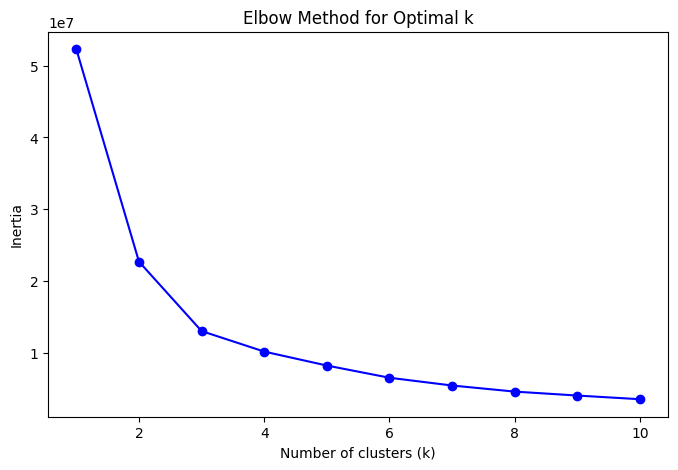

In [165]:
# using elbow method to find optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow_method(data, max_k=10, lat_col='lat', long_col='long'):
    inertia = []
    K = range(1, max_k + 1)
    
    # compute KMeans for each number of clusters and record inertia
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data[[lat_col, long_col]])
        inertia.append(kmeans.inertia_)
    
    # plot the Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia, 'bo-')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()

# apply on X_train
plot_elbow_method(X_train)

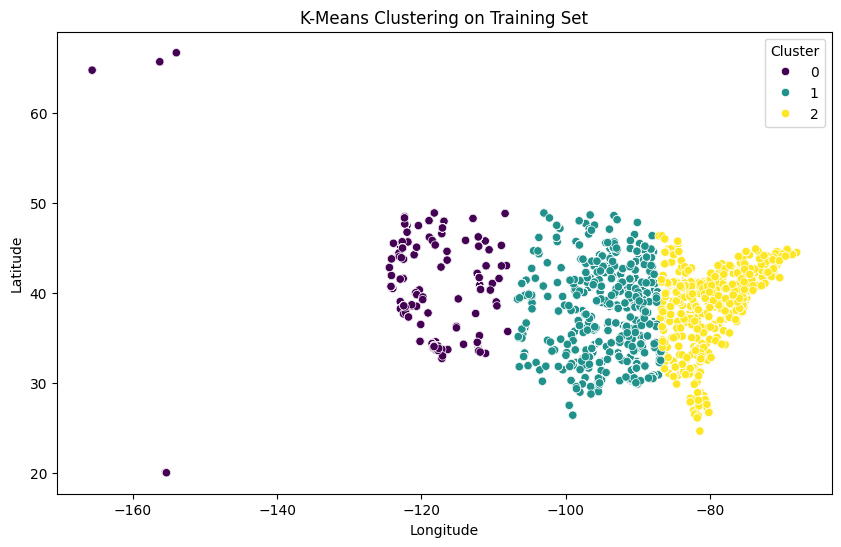

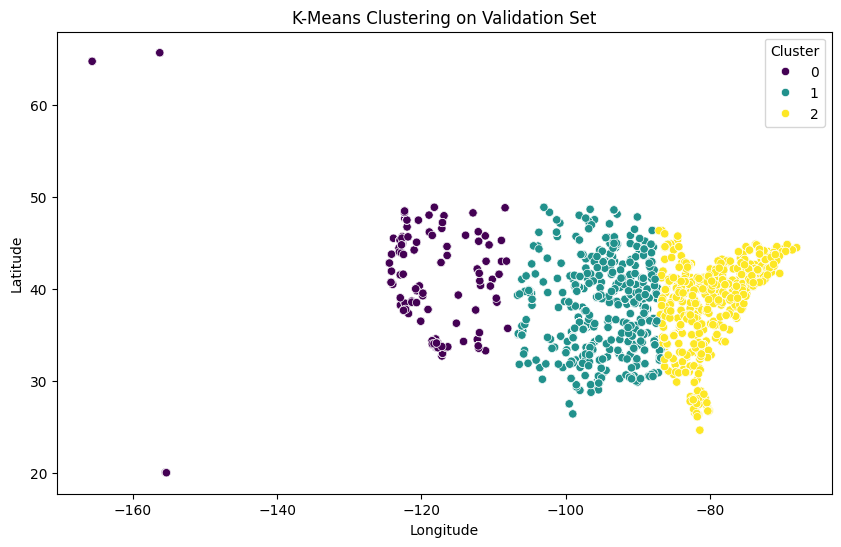

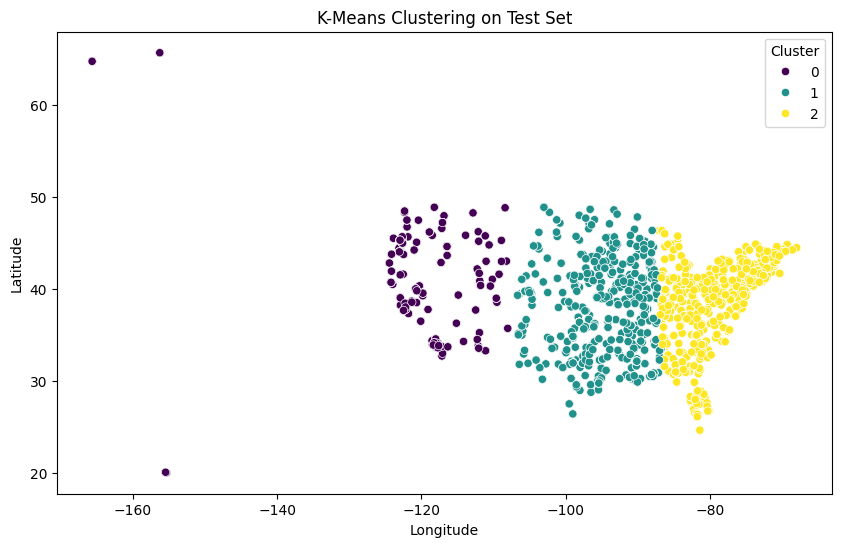

In [166]:
# k-means clustering

from sklearn.cluster import KMeans
import seaborn as sns

# fit KMeans on the training data
n_clusters = 3 #based on elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train[['lat', 'long']])  #only fit on X_train

# assign clusters to each set (train, valid, and test)
X_train['cluster'] = kmeans.predict(X_train[['lat', 'long']])
X_valid['cluster'] = kmeans.predict(X_valid[['lat', 'long']])
X_test['cluster'] = kmeans.predict(X_test[['lat', 'long']])

# visualize clusters for each dataset
def plot_clusters(data, lat_col='lat', long_col='long', title="Cluster Plot"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=long_col, y=lat_col, hue='cluster', data=data, palette="viridis")
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Cluster")
    plt.show()
plot_clusters(X_train, title="K-Means Clustering on Training Set")
plot_clusters(X_valid, title="K-Means Clustering on Validation Set")
plot_clusters(X_test, title="K-Means Clustering on Test Set")

In [167]:
# check number of datapoints per cluster in each dataset
print("Cluster counts in X_train:")
print(X_train['cluster'].value_counts())

print("\nCluster counts in X_valid:")
print(X_valid['cluster'].value_counts())

print("\nCluster counts in X_test:")
print(X_test['cluster'].value_counts())

Cluster counts in X_train:
cluster
2    115106
1     89395
0     28167
Name: count, dtype: int64

Cluster counts in X_valid:
cluster
2    14541
1    11796
0     3663
Name: count, dtype: int64

Cluster counts in X_test:
cluster
2    14578
1    11818
0     3604
Name: count, dtype: int64


Clustering - DBSCAN (more for large datasets, cluster based on density)

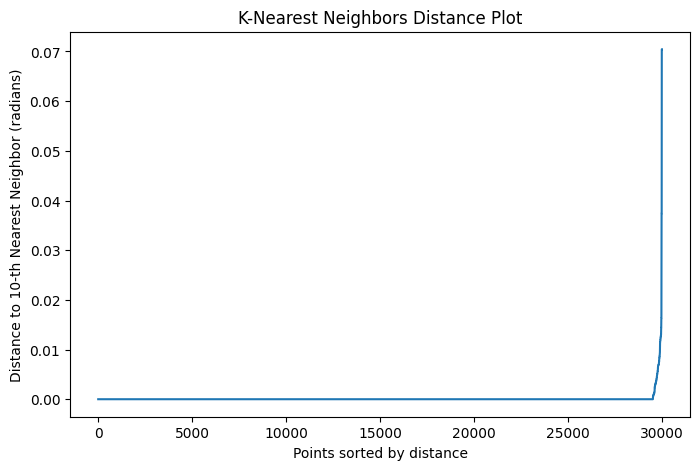

In [168]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# convert lat/long to radians
coords_rad = np.radians(X_valid[['lat', 'long']])

# fit K-Nearest Neighbors with k=min_samples
min_samples = 10
neighbors = NearestNeighbors(n_neighbors=min_samples, metric='haversine')
neighbors_fit = neighbors.fit(coords_rad)
distances, indices = neighbors_fit.kneighbors(coords_rad)

# sort distances for each point to its kth nearest neighbor
distances = np.sort(distances[:, min_samples-1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.ylabel("Distance to {}-th Nearest Neighbor (radians)".format(min_samples))
plt.xlabel("Points sorted by distance")
plt.title("K-Nearest Neighbors Distance Plot")
plt.show()

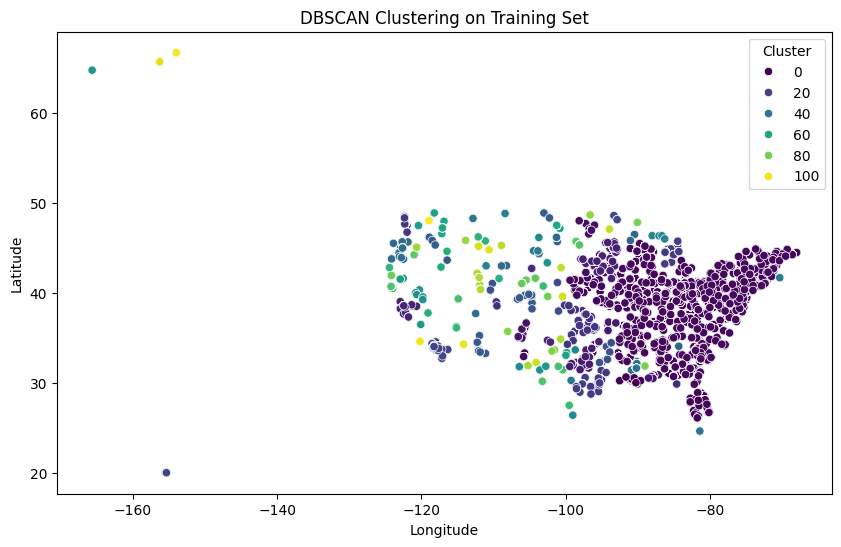

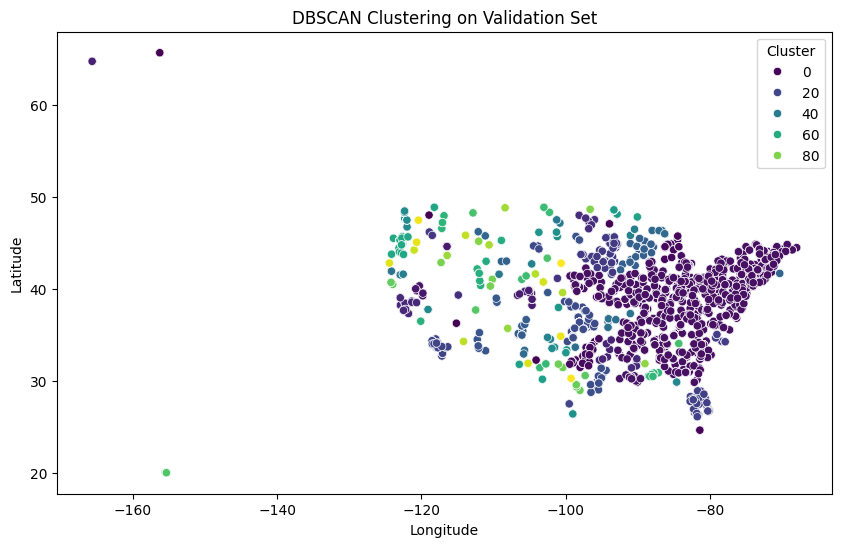

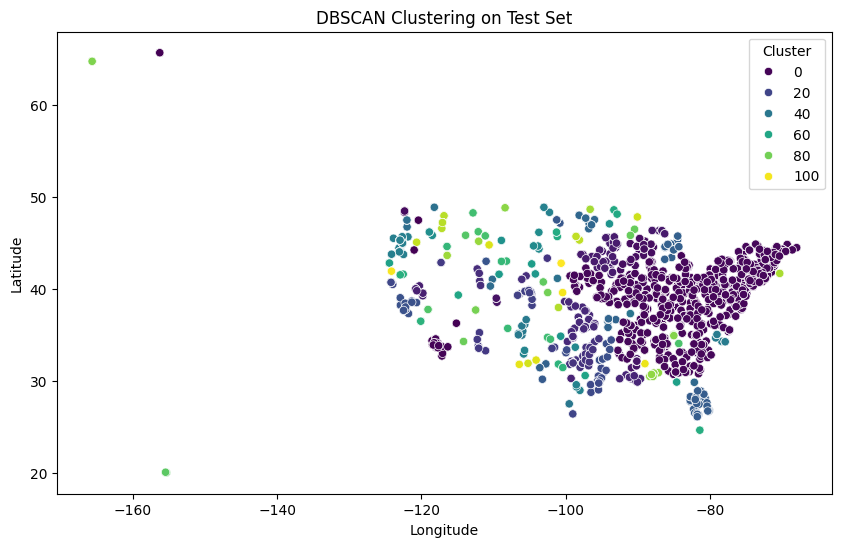

In [169]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# define the DBSCAN model
chosen_eps = 0.015  #from KNN distance plot
min_samples = 10
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples, algorithm='ball_tree', metric='haversine')

# convert lat/long to radians
coords_train_rad = np.radians(X_train[['lat', 'long']])
coords_valid_rad = np.radians(X_valid[['lat', 'long']])
coords_test_rad = np.radians(X_test[['lat', 'long']])

# fit DBSCAN on X_train
X_train['cluster'] = dbscan.fit_predict(coords_train_rad)

# use the same model to predict clusters for X_valid and X_test
X_valid['cluster'] = dbscan.fit_predict(coords_valid_rad)
X_test['cluster'] = dbscan.fit_predict(coords_test_rad)

# visualize clusters for each dataset
def plot_clusters(data, lat_col='lat', long_col='long', title="Cluster Plot"):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=long_col, y=lat_col, hue='cluster', data=data, palette="viridis")
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Cluster")
    plt.show()
plot_clusters(X_train, title="DBSCAN Clustering on Training Set")
plot_clusters(X_valid, title="DBSCAN Clustering on Validation Set")
plot_clusters(X_test, title="DBSCAN Clustering on Test Set")


In [170]:
# check number of datapoints per cluster in each dataset
print("Cluster counts in Training Set:")
print(X_train['cluster'].value_counts())

print("\nCluster counts in Validation Set:")
print(X_valid['cluster'].value_counts())

print("\nCluster counts in Test Set:")
print(X_test['cluster'].value_counts())

Cluster counts in Training Set:
cluster
2     142227
9       6947
1       6723
15      6091
8       5751
       ...  
76        97
95        45
88        42
93        38
94        35
Name: count, Length: 103, dtype: int64

Cluster counts in Validation Set:
cluster
3     17297
16      841
2       818
18      785
22      776
      ...  
89       10
93       10
56       10
79       10
99       10
Name: count, Length: 101, dtype: int64

Cluster counts in Test Set:
cluster
1     17273
7       850
29      826
14      783
11      754
      ...  
52       13
79       12
96       11
98       10
34       10
Name: count, Length: 104, dtype: int64


Calculate distance b/w merchant and credit card holder's coordinates

In [171]:
# calculate distance b/w merchant and credit card holder's coordinates

def haversine_distance(row):
    # earth radius in km
    radius = 6371  

    # merchant and holder lat/long
    lat_merch, lon_merch = row['merch_lat'], row['merch_long']
    lat_holder, lon_holder = row['lat'], row['long']

    # calculate difference in lat/long
    diff_lat = np.radians(lat_holder - lat_merch)
    diff_lon = np.radians(lon_holder - lon_merch)

    # apply haversine formula
    temp = np.sin(diff_lat / 2) ** 2 + np.cos(np.radians(lat_merch)) * np.cos(np.radians(lat_holder)) * np.sin(diff_lon / 2) ** 2
    central_angle = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1 - temp))
    distance = radius * central_angle

    return distance

# apply the function to compute the distance for train, validation, and test datasets
X_train['distance'] = X_train.apply(haversine_distance, axis=1)
X_valid['distance'] = X_valid.apply(haversine_distance, axis=1)
X_test['distance'] = X_test.apply(haversine_distance, axis=1)

Calculate cartesian coordinates of merchant and credit card holder's location

In [172]:
# calculate cartesian coordinates of merchant and credit card holder's location

def add_cartesian_coordinates(df):
    # merchant coordinates
    df['merch_x'] = np.cos(df['merch_lat']) * np.cos(df['merch_long'])
    df['merch_y'] = np.cos(df['merch_lat']) * np.sin(df['merch_long'])
    df['merch_z'] = np.sin(df['merch_lat'])
    
    # credit card holder coordinates
    df['holder_x'] = np.cos(df['lat']) * np.cos(df['long'])
    df['holder_y'] = np.cos(df['lat']) * np.sin(df['long'])
    df['holder_z'] = np.sin(df['lat'])
    
    # drop original lat/long columns
    # return df.drop(columns=['merch_lat', 'merch_long', 'lat', 'long'])
    return df

# apply the function to train, validation and test datasets
X_train = add_cartesian_coordinates(X_train)
X_valid = add_cartesian_coordinates(X_valid)
X_test = add_cartesian_coordinates(X_test)


### Credit card number and relationship with transactions

- Extracted infromation from `cc_num`
    - Validity of number - Luhn algorithm
    - Card issuer
    - Major Industry Identifier (MII)
    - Card level

- Features by grouping consecutive transactions from same `cc_num`
    - Time since last transaction
    - Haversine Distance since last transaction
    - Transaction Velocity

In [173]:
X_train

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
232663                           0.0                            0.0   
232664                           0.0                            0.0   
232665                           0.0                            0.0   
232666                           0.0                            0.0   
232667                           0.0                            0.0   

        merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
232663                                0.0                         0.0   
232664                                0.0                         0.0   
232665                                0.0                         0.0   
232666                                0.0                         0.0   
232667                                0.0                         0.0   

        merchant_fraud_Adams, Kovacek and Kuhlman  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
232663                                        0.0   
232664                                        0.0   
232665                                        0.0   
232666                                        0.0   
232667                                        0.0   

        merchant_fraud_Adams-Barrows  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   
...                              ...   
232663                           0.0   
232664                           0.0   
232665                           0.0   
232666                           0.0   
232667                           0.0   

        merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
...                                                ...   
232663                                             0.0   
232664                                             0.0   
232665                                             0.0   
232666                                             0.0   
232667                                             0.0   

        merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   
...          

In [191]:
# Bank Identification Number (BIN) Ranges
BIN_RANGES = [
    ("4", "4", "Visa"),
    ("51", "55", "MasterCard"),
    ("2221", "2720", "MasterCard"),
    ("34", "34", "American Express"),
    ("37", "37", "American Express"),
    ("6011", "6011", "Discover"),
    ("65", "65", "Discover"),
    ("644", "649", "Discover"),
    ("622126", "622925", "Discover"),
    ("3528", "3589", "JCB"),
    ("36", "36", "Diners Club"),
    ("38", "38", "Diners Club"),
]

# Major Industry Identifier (MII)
mii_map = {
    '0': "ISO/TC 68 and other industry assignments",
    '1': "Airlines",
    '2': "Airlines and Other Transportation and Related Services",
    '3': "Travel and Entertainment",
    '4': "Banking and Financial",
    '5': "Banking and Financial",
    '6': "Merchandising and Banking",
    '7': "Petroleum",
    '8': "Telecommunications",
    '9': "National Assignment",
}

def get_issuer(card_number):
    for start, end, issuer in BIN_RANGES:
        prefix_length = len(start)
        card_prefix = card_number[:prefix_length]
        if start <= card_prefix <= end:
            return issuer
    return "Unknown"

def extract_card_info(card_number):
    """
    Extract useful information from a credit card number.
    :param card_number: str - The credit card number to analyze
    :return: dict - Dictionary containing various pieces of information
    """
    card_info = {}
    
    # Step 1: Ensure input is a string and remove non-digit characters
    card_number = ''.join(filter(str.isdigit, str(card_number).strip()))
    
    # Step 2: Validate the card number length
    length = len(card_number)
    # card_info['length'] = length
    
    # Step 3: Identify the card issuer
    issuer = get_issuer(card_number)
    card_info['issuer'] = issuer
    
    # Step 4: Validate using Luhn algorithm

    def luhn_algorithm(card_num):
        """
        Algorithm involves splitting numbers by whether they are at odd or even indexes
        """
        digits = [int(d) for d in card_num]
        checksum = 0
        parity = len(digits) % 2
        for i, digit in enumerate(digits):
            if i % 2 == parity:
                digit *= 2
                if digit > 9:
                    digit -= 9
            checksum += digit
        return checksum % 10 == 0
    
    card_info['luhn_valid'] = luhn_algorithm(card_number)
    
    # Step 5: Major Industry Identifier (MII)
    mii = mii_map.get(card_number[0], "Unknown Industry")
    card_info['mii'] = mii
    
    # Step 6: Card Level (if applicable, for AMEX or others)
    card_info['card_level'] = "Standard"  # Default value
    if issuer == "American Express" and length == 15:
        card_info['card_level'] = "Gold or Platinum"
    
    # Step 7: Validate Length (as a preliminary check)
    # valid_length = {
    #     "Visa": [13, 16, 19],
    #     "MasterCard": [16],
    #     "American Express": [15],
    #     "Discover": [16, 19],
    #     "JCB": [15, 16],
    #     "Diners Club": [14],  # Diners Club typically has 14 digits
    # }
    # if issuer in valid_length:
    #     card_info['length_valid'] = length in valid_length[issuer]
    # else:
    #     card_info['length_valid'] = False
    
    return card_info

# Function to add information to Dataframe
def analyze_credit_cards(df, column='cc_num'):
    """
    Analyze credit card numbers in a DataFrame and extract useful information,
    adding the results directly to the DataFrame.
    :param df: DataFrame containing credit card numbers
    :param column: str - Name of the column containing credit card numbers
    :return: DataFrame with extracted card information
    """
    # Apply the extract_card_info function to each card number
    results = df[column].apply(extract_card_info).tolist()
    
    # Convert results to DataFrame
    df_results = pd.DataFrame(results)
    
    # Concatenate the results with the original DataFrame
    df_combined = pd.concat([df, df_results], axis=1)
    
    return df_combined


X_train = analyze_credit_cards(X_train)
X_valid = analyze_credit_cards(X_valid)
X_test = analyze_credit_cards(X_test)

Visualising distribution of extracted credit card details for **Train**

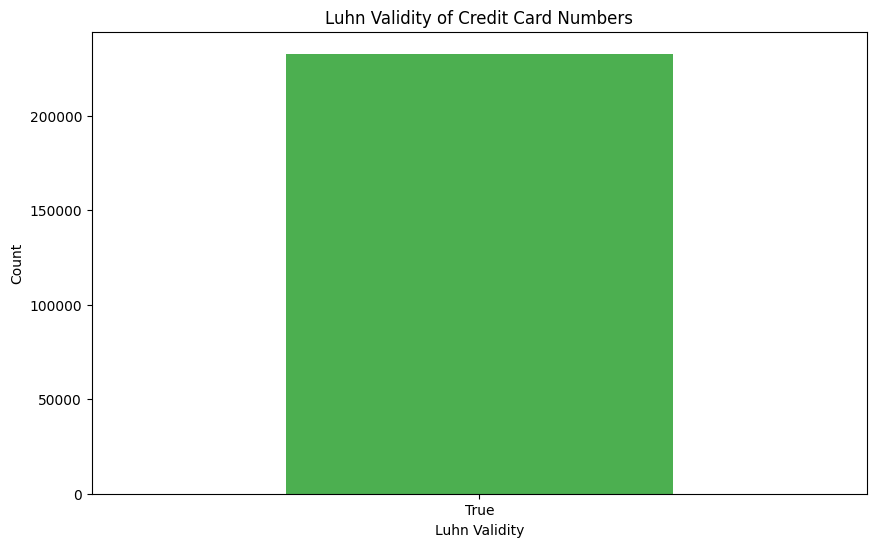

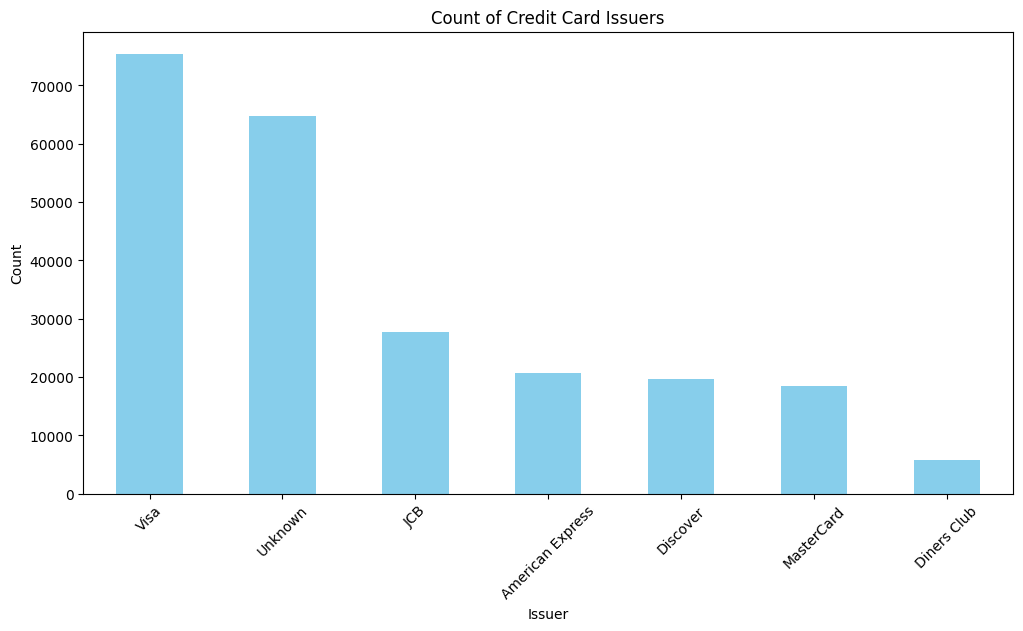

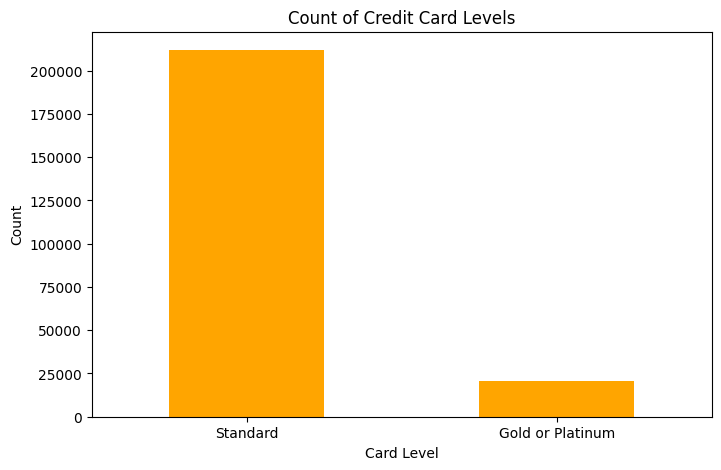

In [ ]:
plt.style.use('default')

# Luhn Validity Plot
plt.figure(figsize=(10, 6))
length_valid_counts = X_train['luhn_valid'].value_counts()
length_valid_counts.plot(kind='bar', color=['#4CAF50', '#FF5733'])
plt.title('Luhn Validity of Credit Card Numbers')
plt.xlabel('Luhn Validity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Issuer Counts Plot
plt.figure(figsize=(12, 6))
issuer_counts = X_train['issuer'].value_counts()
issuer_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Credit Card Issuers')
plt.xlabel('Issuer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Card Level Counts Plot
plt.figure(figsize=(8, 5))
card_level_counts = X_train['card_level'].value_counts()
card_level_counts.plot(kind='bar', color='orange')
plt.title('Count of Credit Card Levels')
plt.xlabel('Card Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Obtaining features based on consecutive transactions by the same `cc_num`

In [ ]:
# from tqdm import tqdm

# Optional: Initialize tqdm for pandas
# tqdm.pandas()

# Haversine function for vectorized distance calculation
def haversine_vectorized(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) using the Haversine formula.
    Returns distance in kilometers.
    """
    R = 6371  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lat2_rad = np.radians(lat2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = np.radians(lon2 - lon1)

    a = np.sin(delta_lat / 2.0)**2 + \
        np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance = R * c
    return distance

# Function to perform feature engineering
def add_transaction_features(df):
    """
    Adds time difference, distance, and velocity features between consecutive transactions.
    Preserves the original order of the DataFrame.
    
    :param df: pandas DataFrame with columns ['cc_num', 'unix_time', 'merch_lat', 'merch_long']
    :return: pandas DataFrame with new features added
    """
    # Ensure DataFrame is sorted by 'cc_num' and 'unix_time' before processing
    df_sorted = df.sort_values(by=['cc_num', 'unix_time']).copy()

    # Add an index column to preserve original order
    df_sorted['original_order'] = df_sorted.index

    # Calculate the time since the last transaction
    df_sorted['time_since_last_trans'] = (
        df_sorted.groupby('cc_num')['unix_time']
        .transform(lambda x: x.diff().fillna(0))
    )

    # Shift the merchant coordinates to get previous transaction's merchant location
    df_sorted['prev_merch_lat'] = df_sorted.groupby('cc_num')['merch_lat'].shift(1)
    df_sorted['prev_merch_long'] = df_sorted.groupby('cc_num')['merch_long'].shift(1)

    # Calculate the distance between previous and current merchant locations using Haversine formula
    df_sorted['dist_from_last_trans'] = haversine_vectorized(
        df_sorted['prev_merch_lat'],
        df_sorted['prev_merch_long'],
        df_sorted['merch_lat'],
        df_sorted['merch_long']
    ).fillna(0)  # Fill NaN with 0 for the first transaction

    # Calculate transaction velocity (km/h)
    df_sorted['transaction_velocity'] = np.where(
        df_sorted['time_since_last_trans'] > 0,
        df_sorted['dist_from_last_trans'] / (df_sorted['time_since_last_trans'] / 3600),  # km/h
        0  # Velocity is 0 if time difference is 0
    )

    # Optionally, handle infinite velocities resulting from zero time differences
    df_sorted['transaction_velocity'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Sort the DataFrame back to its original order using the 'original_order' column
    df_final = df_sorted.sort_values(by='original_order').copy()

    # Drop the auxiliary columns used for calculation
    df_final.drop(columns=['original_order', 'prev_merch_lat', 'prev_merch_long'], inplace=True)

    # Reset index if necessary
    df_final.reset_index(drop=True, inplace=True)

    return df_final


X_train = add_transaction_features(X_train)
X_valid = add_transaction_features(X_valid)
X_test = add_transaction_features(X_test)

In [194]:
pd.set_option('display.max_columns', None)
X_train

merchant_fraud_Abbott-Rogahn  merchant_fraud_Abbott-Steuber  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
232663                           0.0                            0.0   
232664                           0.0                            0.0   
232665                           0.0                            0.0   
232666                           0.0                            0.0   
232667                           0.0                            0.0   

        merchant_fraud_Abernathy and Sons  merchant_fraud_Abshire PLC  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
232663                                0.0                         0.0   
232664                                0.0                         0.0   
232665                                0.0                         0.0   
232666                                0.0                         0.0   
232667                                0.0                         0.0   

        merchant_fraud_Adams, Kovacek and Kuhlman  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
232663                                        0.0   
232664                                        0.0   
232665                                        0.0   
232666                                        0.0   
232667                                        0.0   

        merchant_fraud_Adams-Barrows  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   
...                              ...   
232663                           0.0   
232664                           0.0   
232665                           0.0   
232666                           0.0   
232667                           0.0   

        merchant_fraud_Altenwerth, Cartwright and Koss  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
...                                                ...   
232663                                             0.0   
232664                                             0.0   
232665                                             0.0   
232666                                             0.0   
232667                                             0.0   

        merchant_fraud_Altenwerth-Kilback  merchant_fraud_Ankunding LLC  \
0                                     0.0                           0.0   
1                                     0.0                           0.0   
2                                     0.0                           0.0   
3                                     0.0                           0.0   
4                                     0.0                           0.0   
...          

### Distance/Time between consecutive transactions by customer

# Outputting Processed Data

In [ ]:
# # join X_train and y_train to create output train df
# output_train = pd.concat([X_train, y_train], axis=1)

# # join X_valid and y_valid to create output validation df
# output_valid = pd.concat([X_valid, y_valid], axis=1)

# # join X_test and y_test to create output test df
# output_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# # output train df as csv
# output_train.to_csv('../data/processed/train.csv', index=False)

# # output validation df as csv
# output_valid.to_csv('../data/processed/validation.csv', index=False)

# # output test df as csv
# output_test.to_csv('../data/processed/test.csv', index=False)